# EMPLOYEE ATTRITION

## Importing The Neccesary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE
from itertools import cycle

## Loading The Dataset

In [2]:
df=pd.read_csv("HR Employee Attrition.csv") 

In [3]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

## Exploring The Dataset

In [4]:
df.shape

(1470, 35)

In [5]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

## Data Cleaning

### Checking Null Values

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df.isnull().mean()*100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

### Checking Duplicated Values

In [12]:
df.duplicated().sum()

0

### Droping The Unneccesary Columns

In [13]:
df.drop('EmployeeNumber' , axis=1 ,inplace=True)


In [14]:
pd.set_option('display.max_columns', None)
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           2  Female          94               3         2   
1                           3    Male          61               2         2   
2                           4    Male          92               2         1   
3                           4  Female          56               3         1   
4                           1    Male          40               3         1   
...                       ...     ...         ...             ...       ...   
1465                        3    Male          41               4         2   
1466                        4    Male          42               2         3   
1467                        2    Male          87               4         2   
1468                        4    Male          63               2         2   
1469                        2    Male          82               4         2   

                        JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0               Sales Executive                4        Single           5993   
1            Research Scientist                2       Married           5130   
2         Laboratory Technician                3        Single           2090   
3            Research Scientist                3       Married           2909   
4         Laboratory Technician                2       Married           3468   
...                         ...              ...           ...            ...   
1465      Laboratory Technician                4       Married           2571   
1466  Healthcare Representative                1       Married           9991   
1467     Manufacturing Director                2       Married           6142   
1468            Sales Executive                2       Married           5390   
1469      Laboratory Technician                3       Married           4404   

      MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0           19479                   8      Y      Yes                 11   
1           24907                   1      Y       No                 23   
2            2396                   6      Y      Yes                 15   
3           23159                   1      Y      

## Exploratory Data Analysis


### UNIVARIATE ANALYSIS

### Histplot

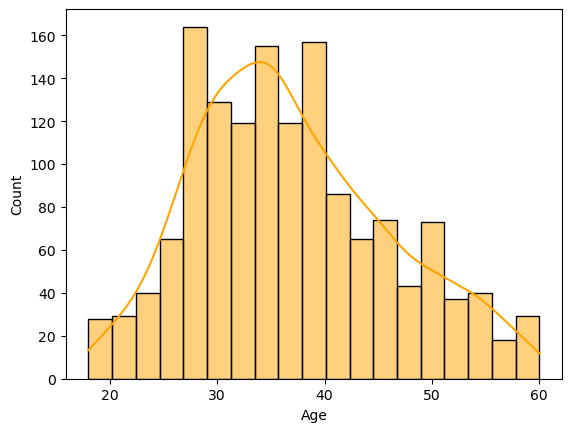

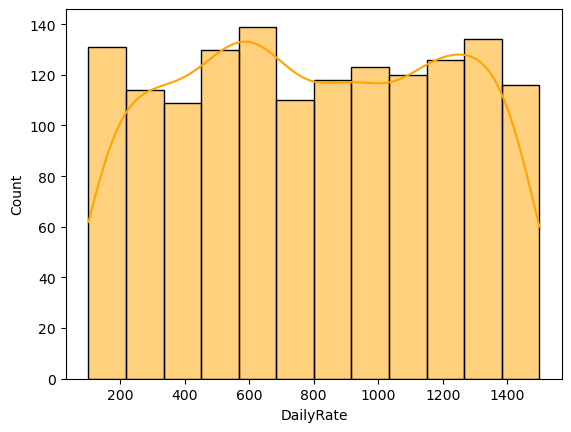

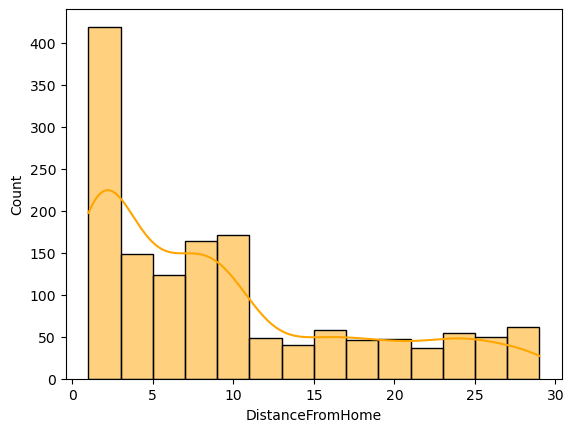

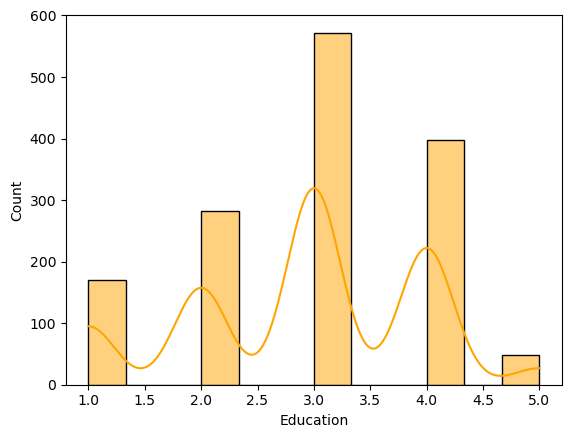

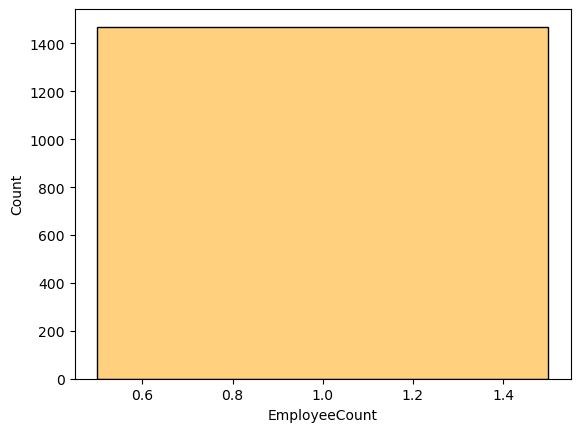

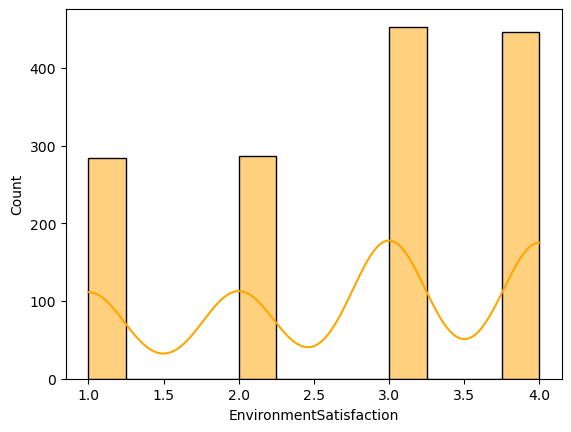

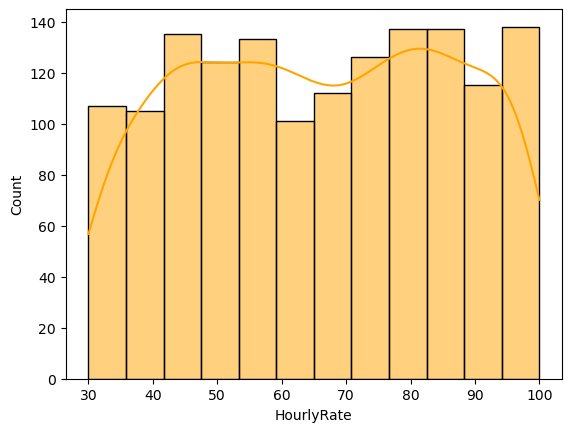

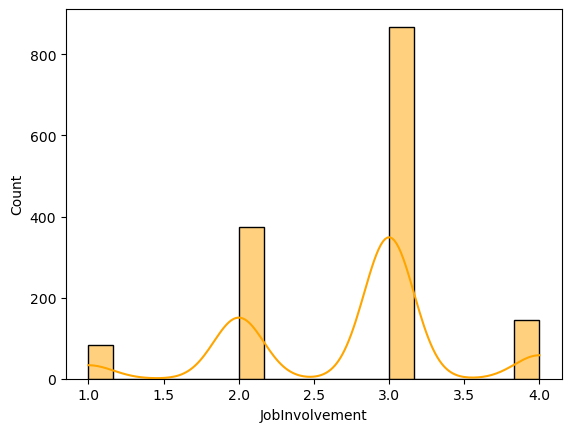

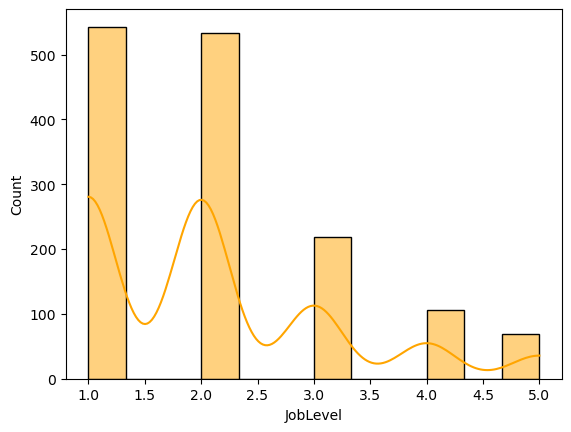

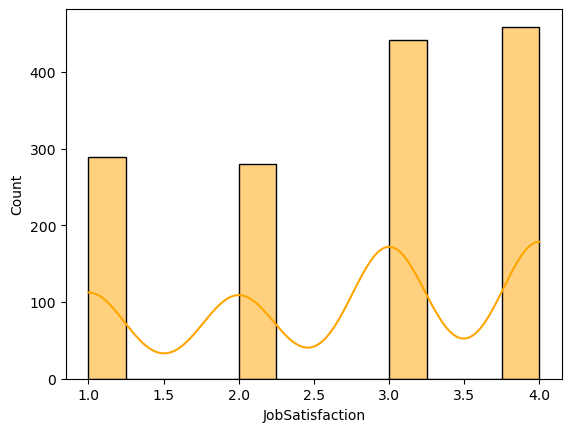

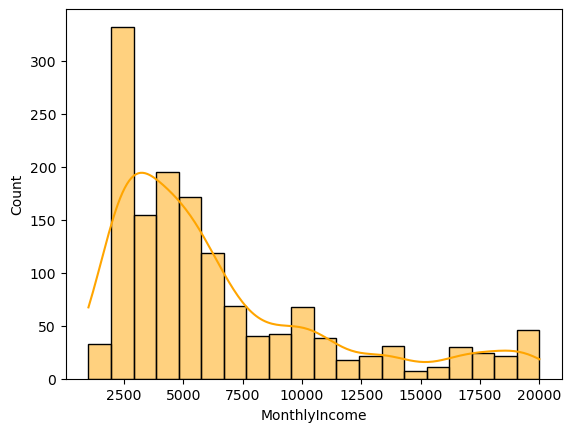

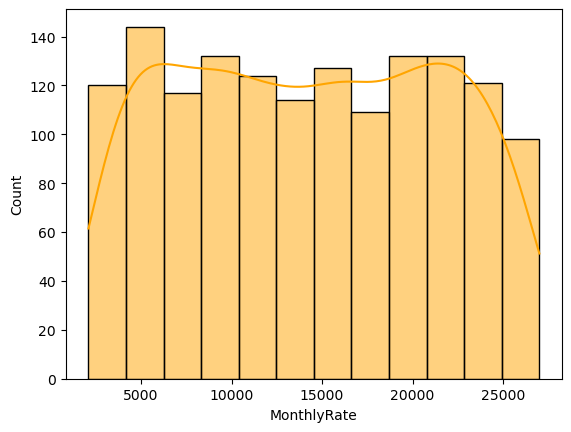

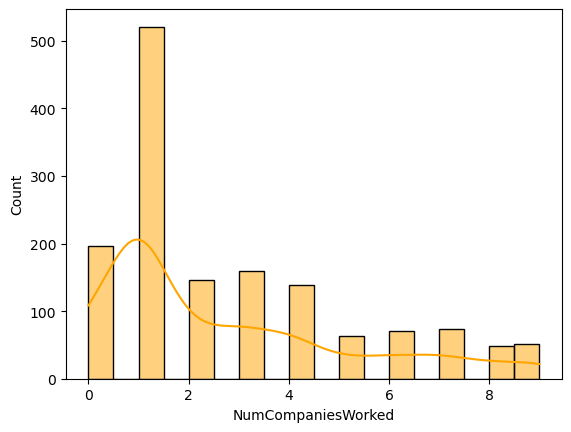

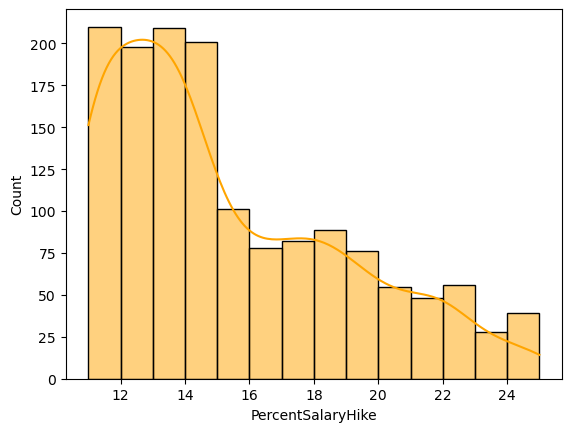

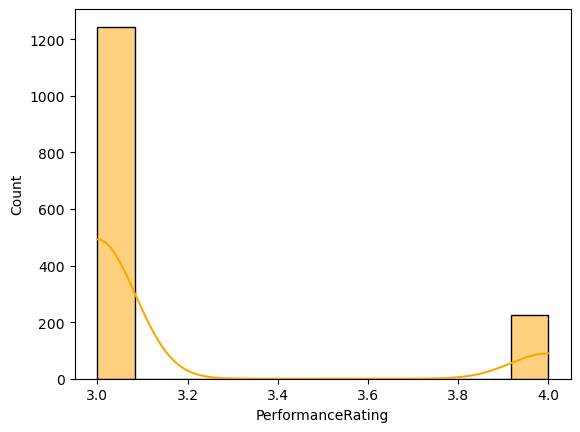

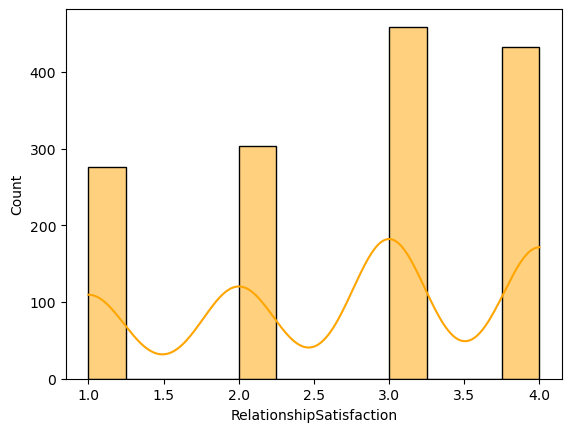

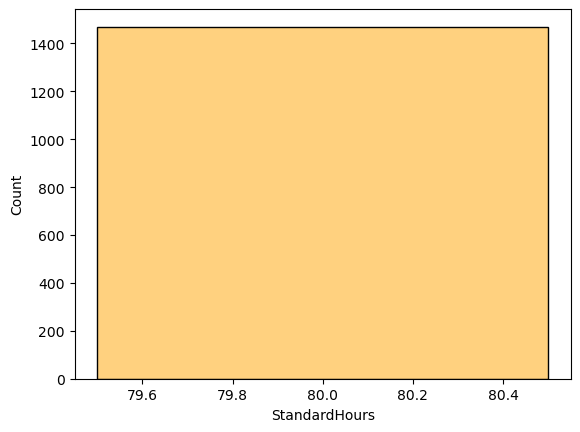

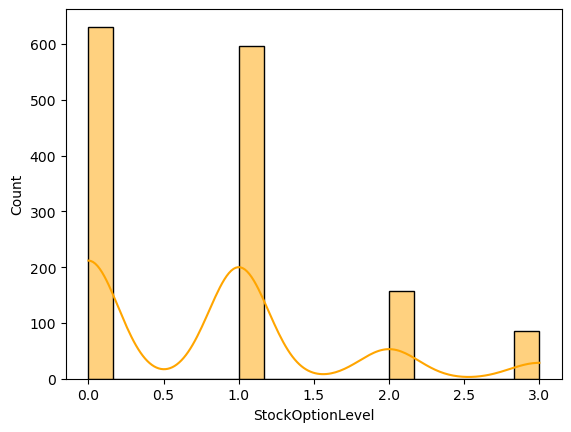

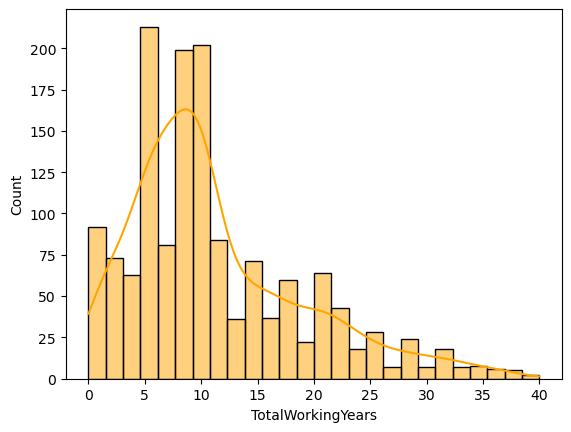

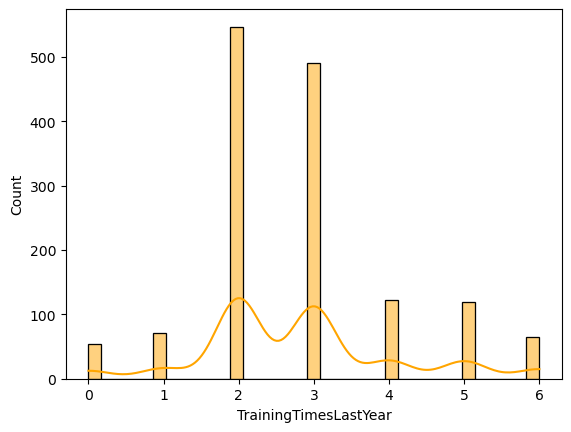

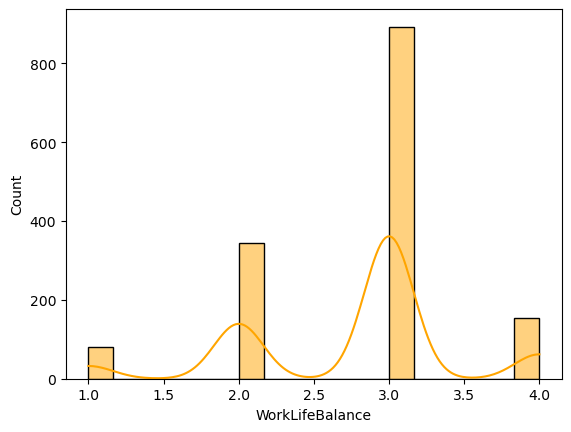

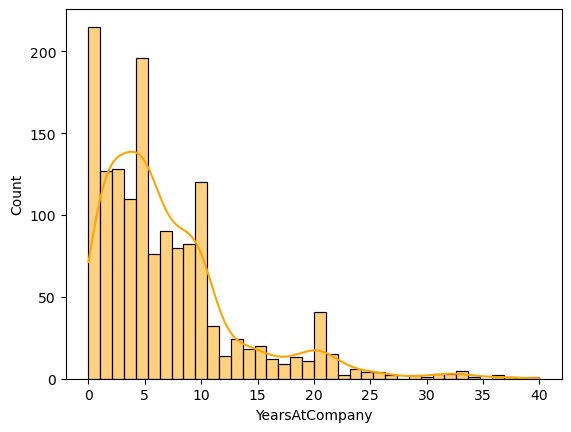

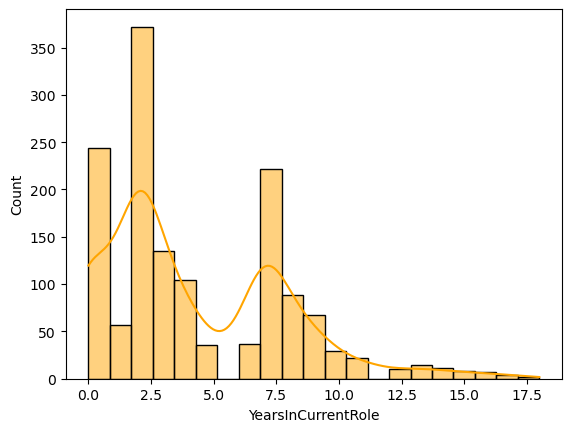

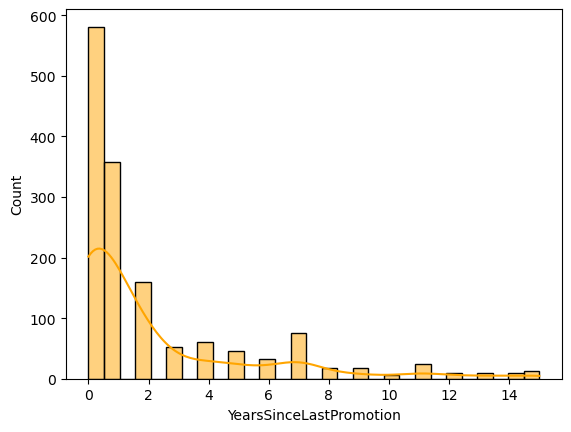

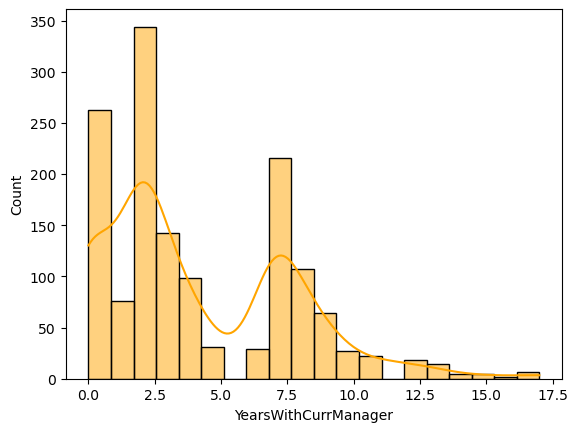

In [15]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.histplot(df, x=df[column], kde=True, color="orange")
        plt.show()

### Box Plot

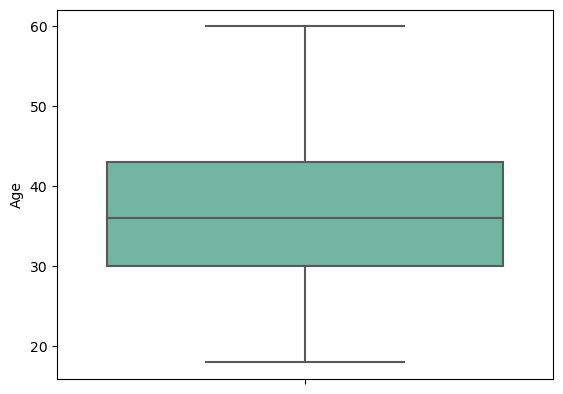

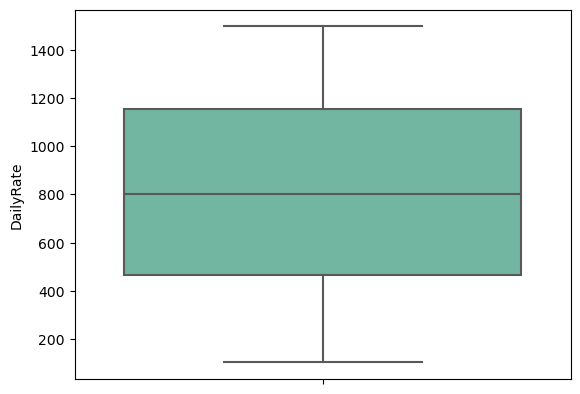

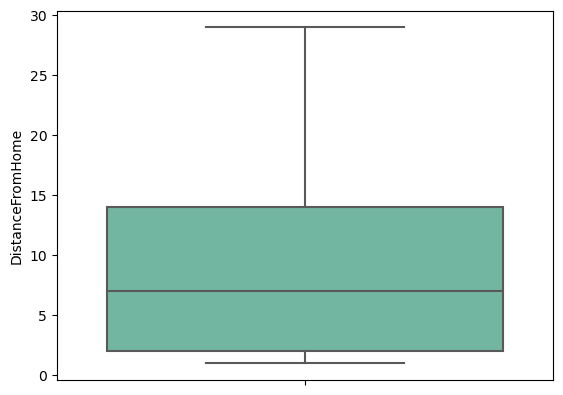

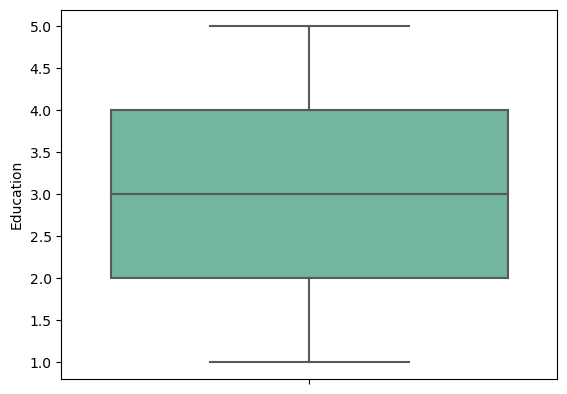

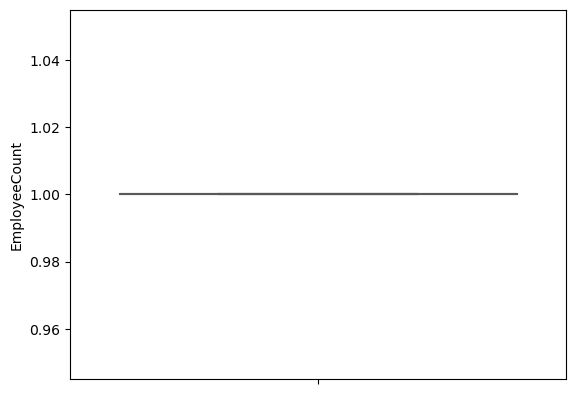

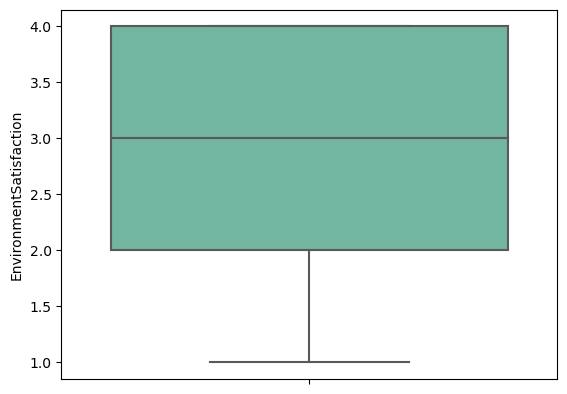

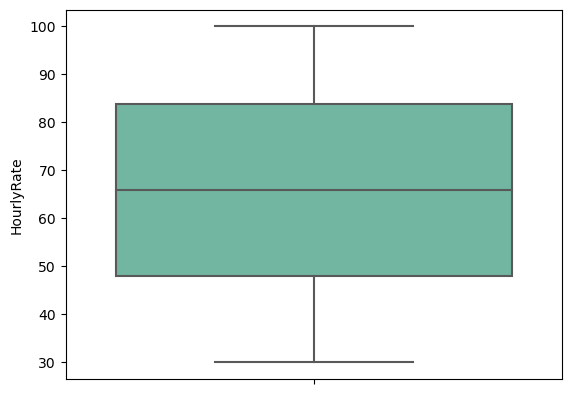

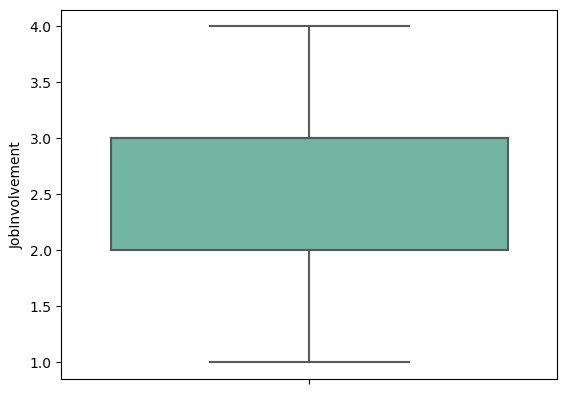

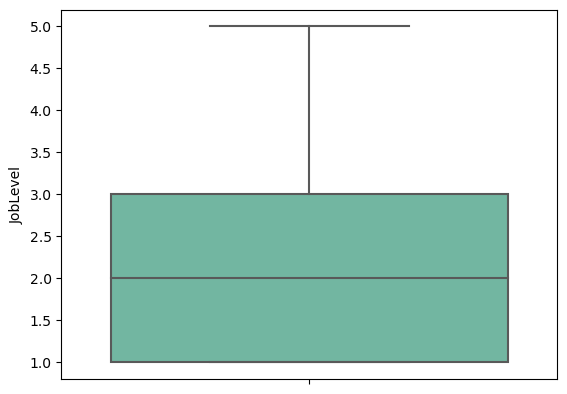

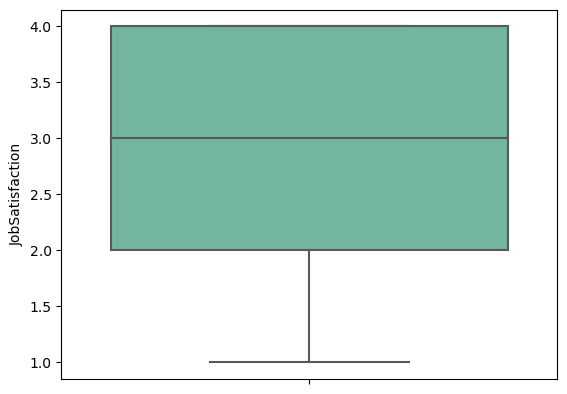

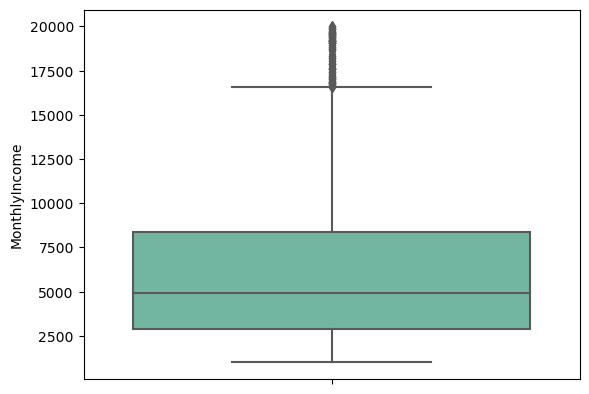

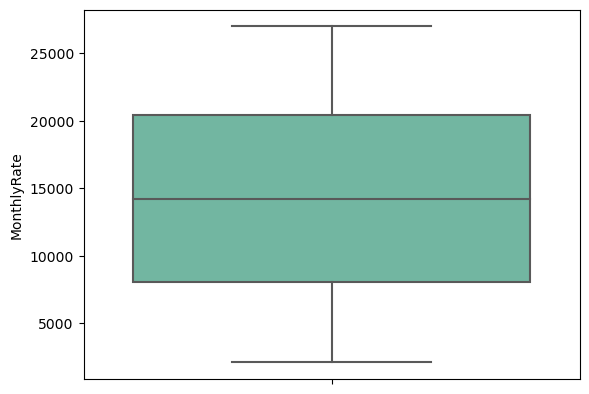

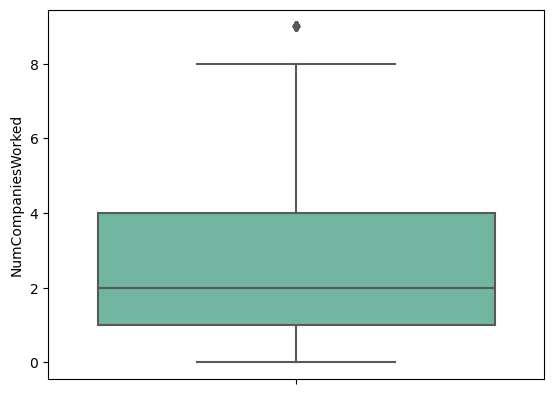

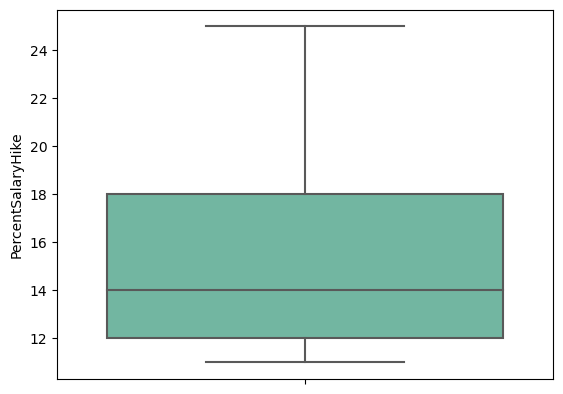

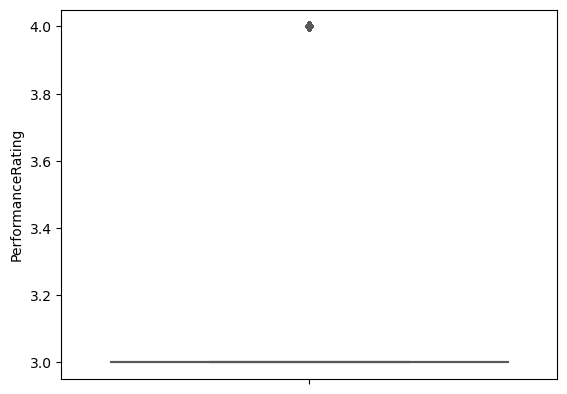

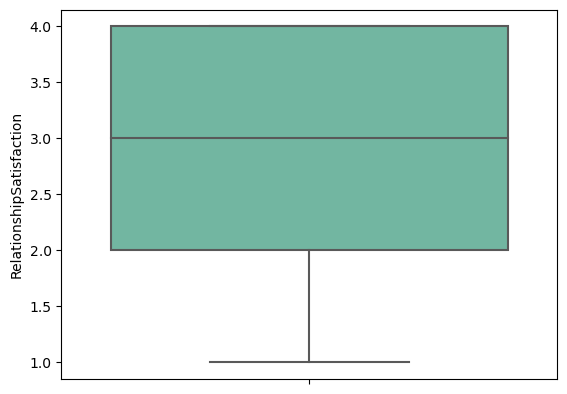

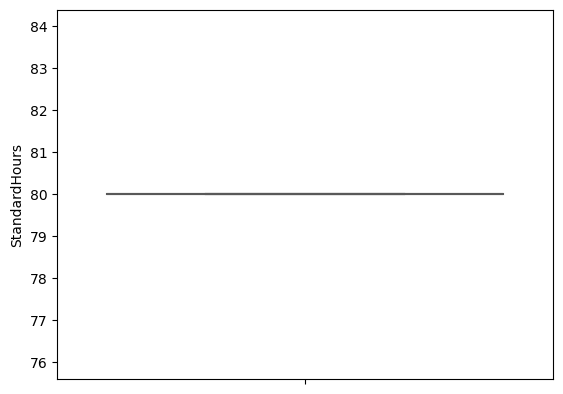

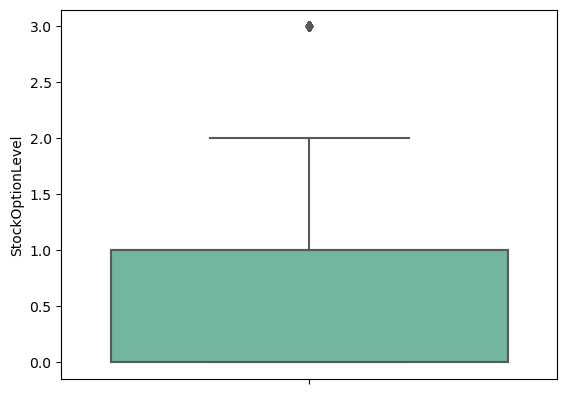

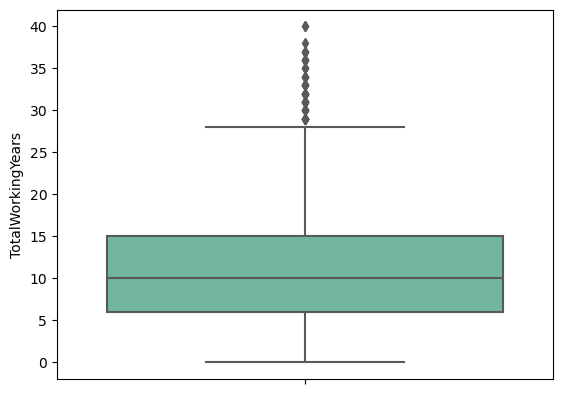

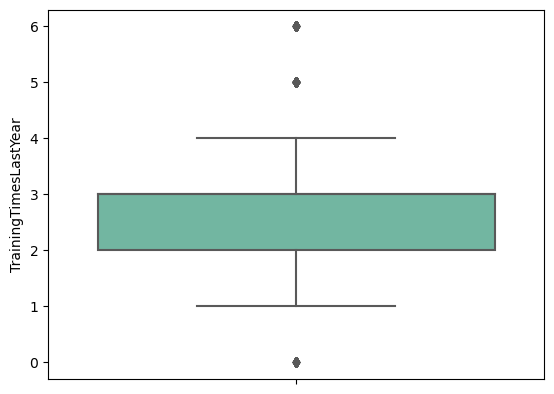

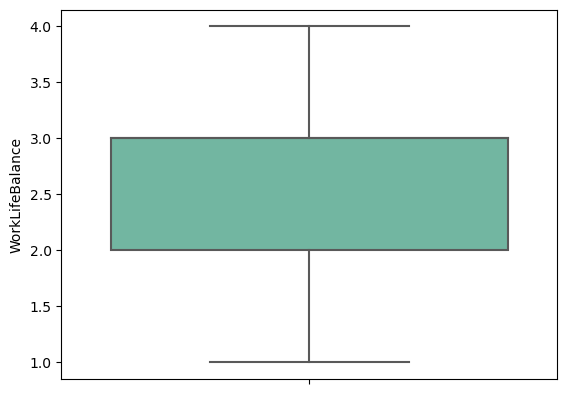

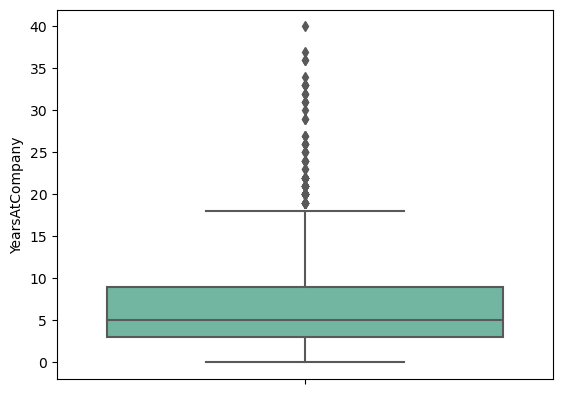

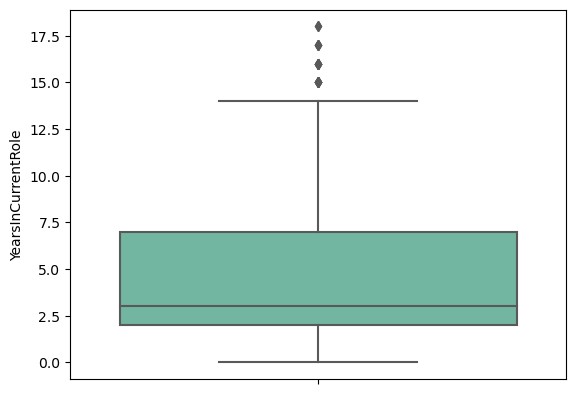

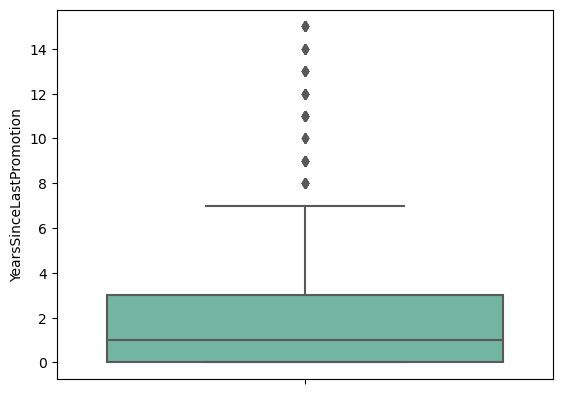

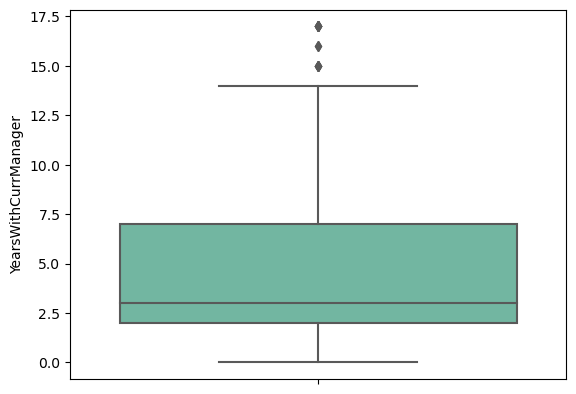

In [16]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column] ,  palette="Set2")
        plt.show()

### Kde Plot

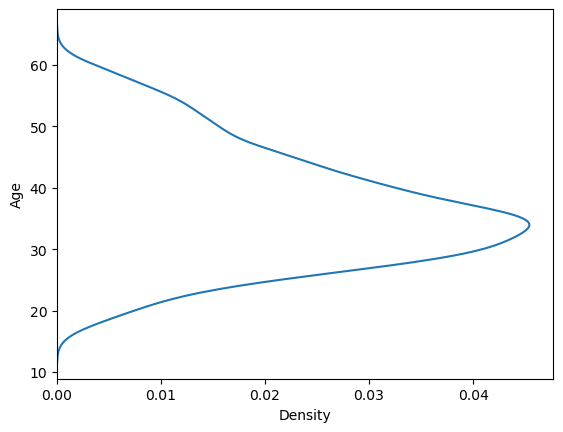

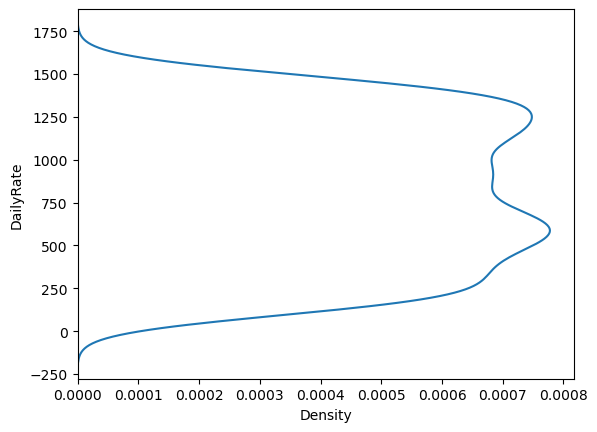

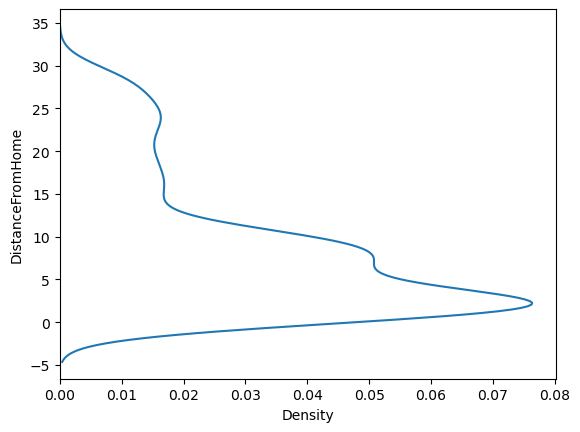

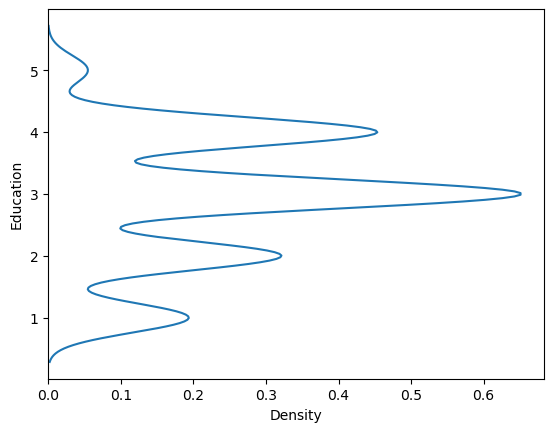

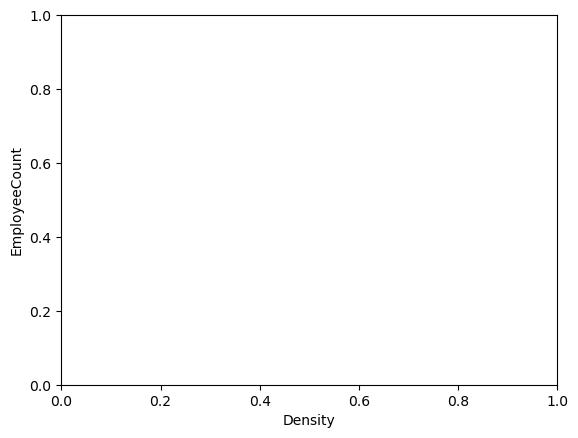

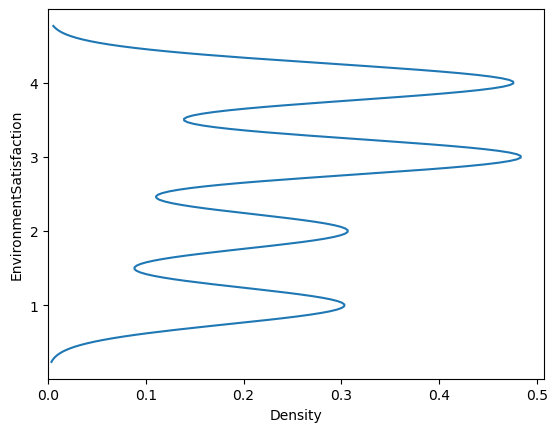

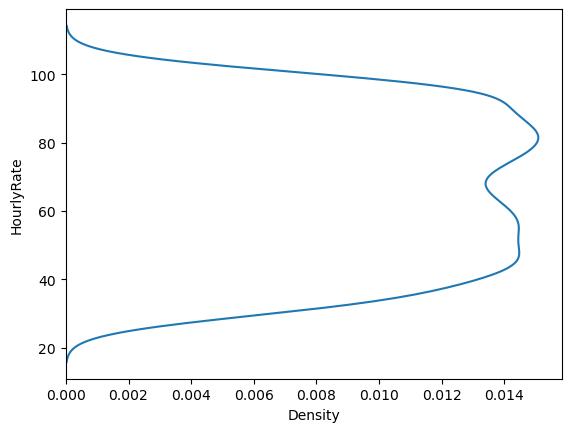

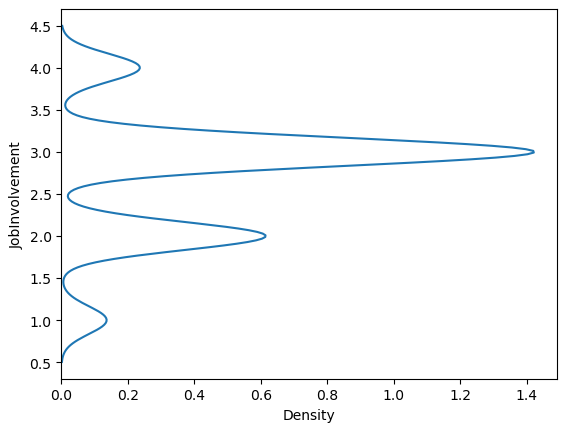

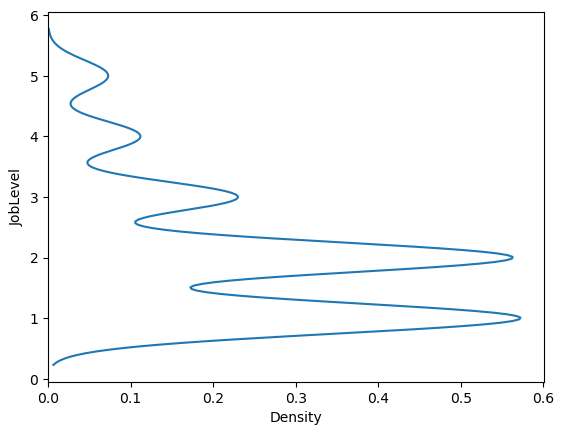

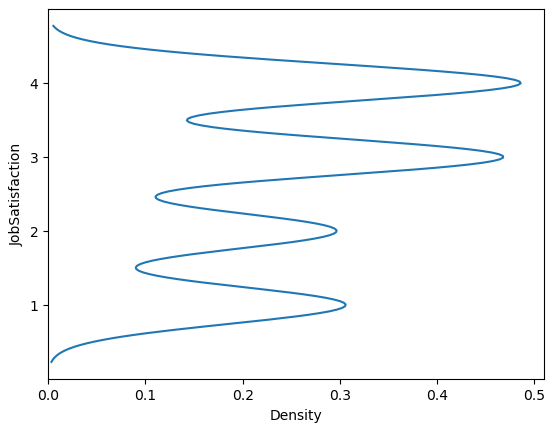

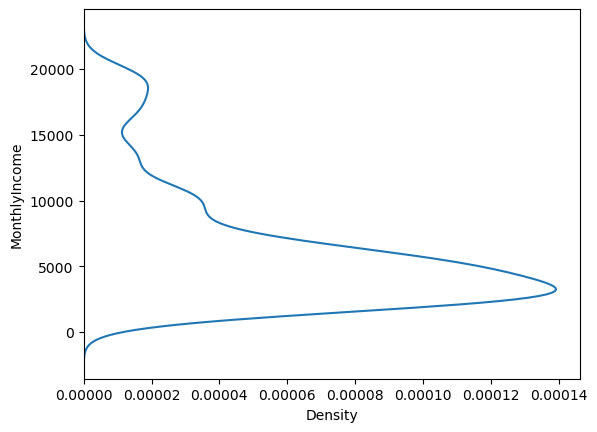

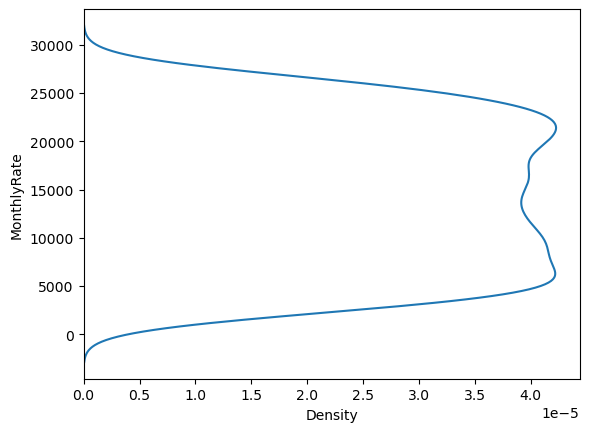

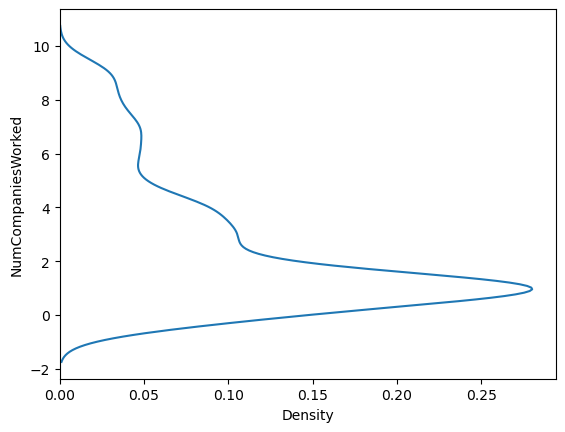

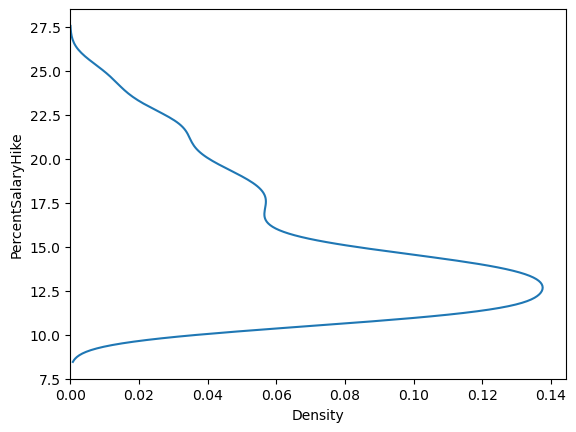

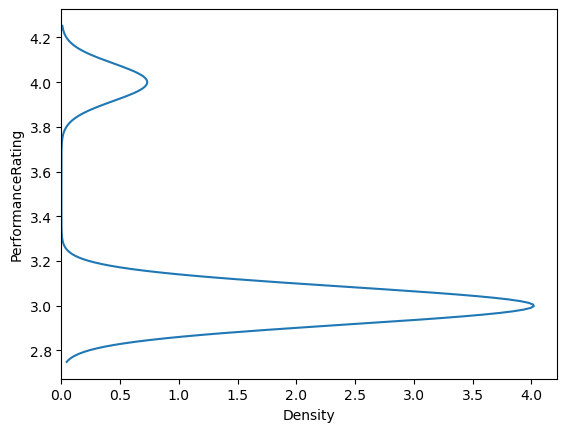

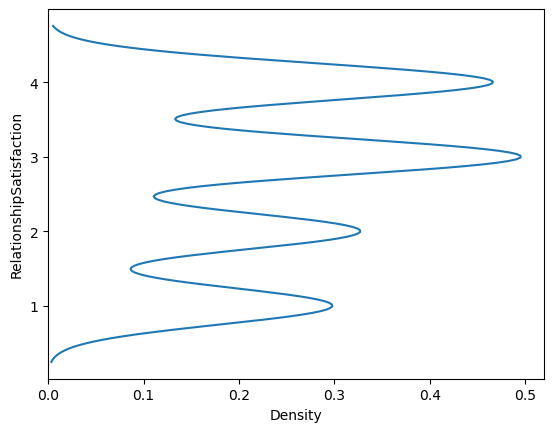

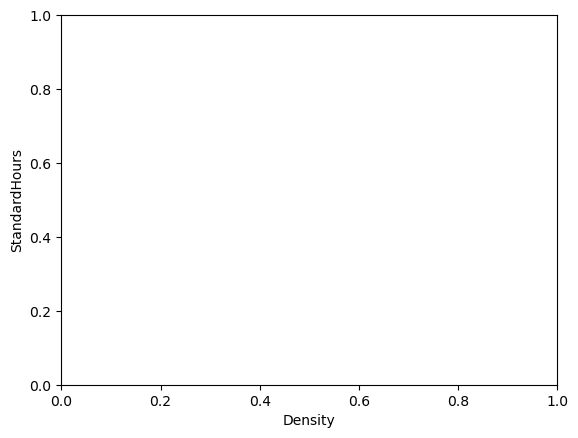

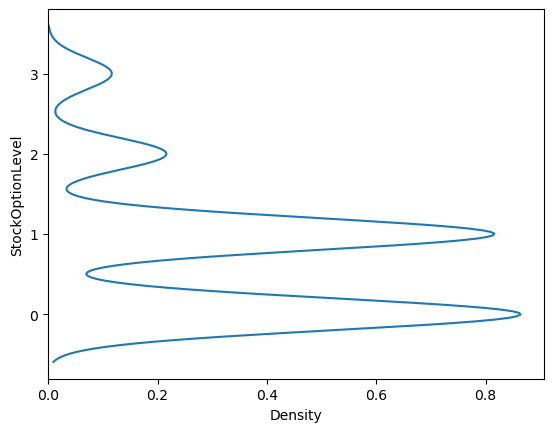

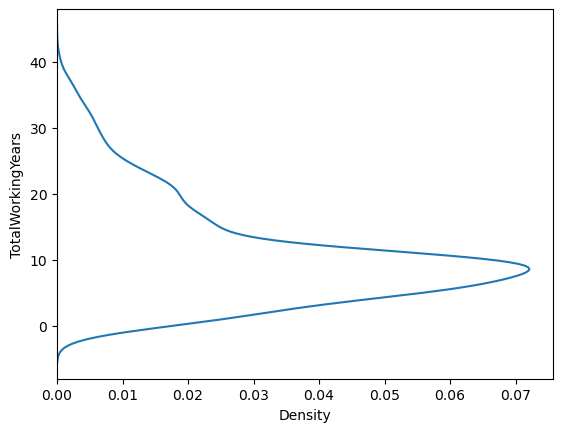

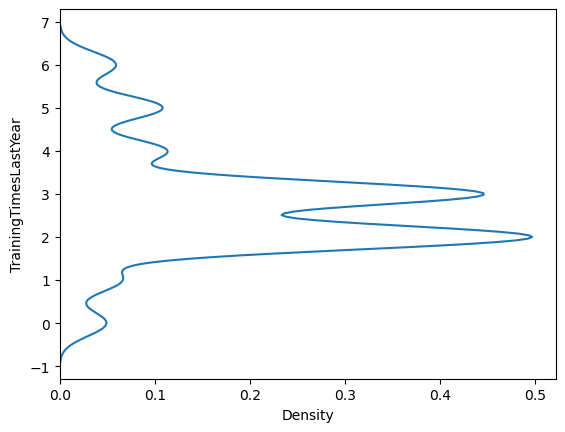

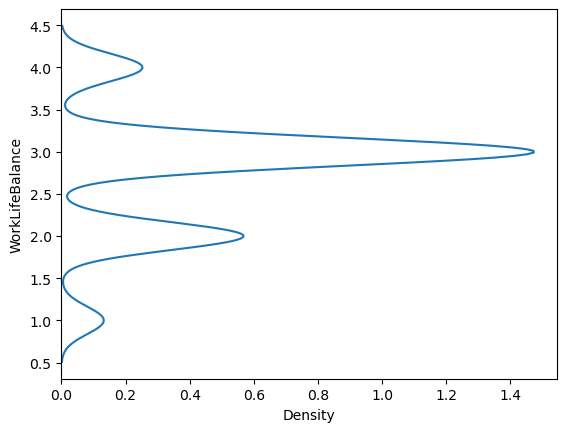

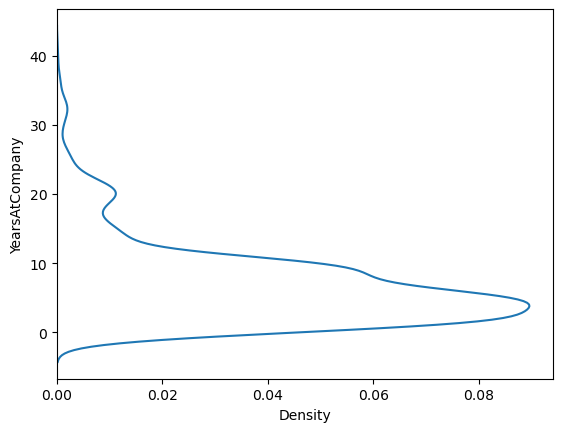

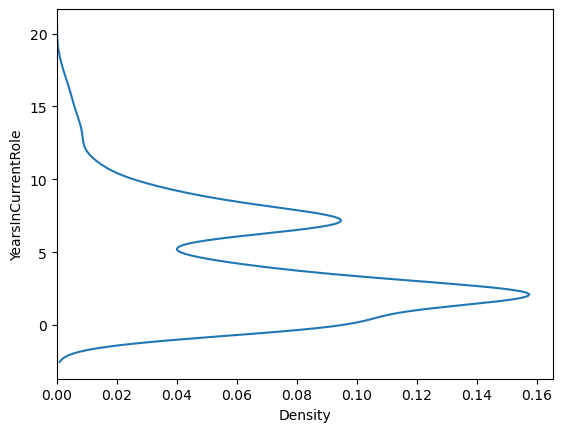

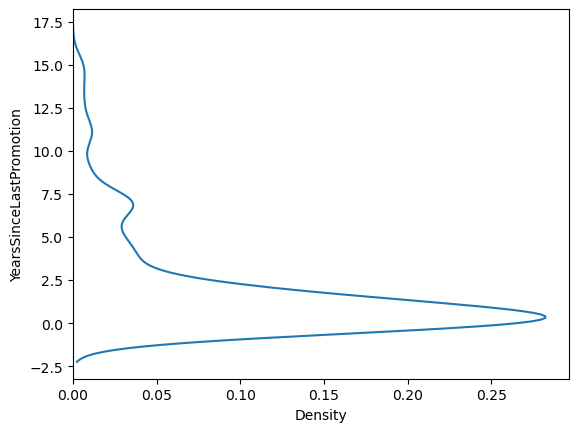

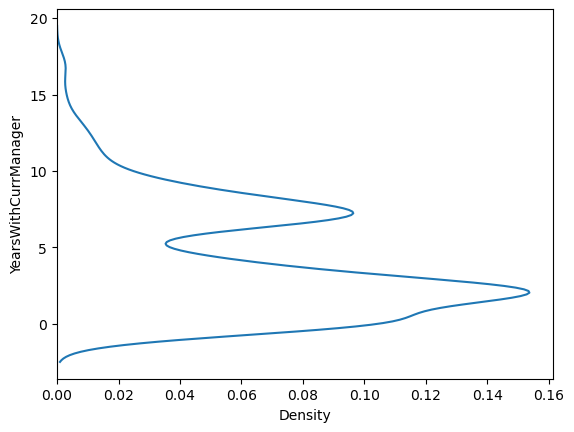

In [17]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.kdeplot(y = df[column])
        plt.show()

### Bar Plot

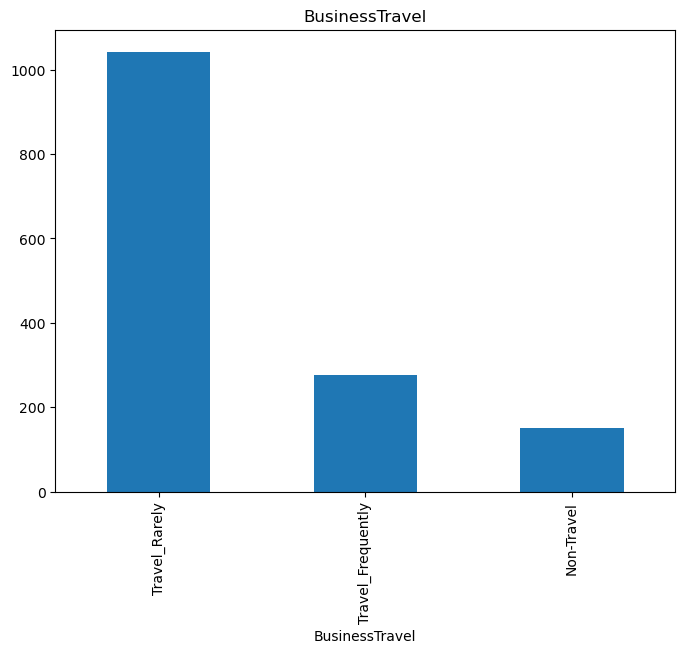

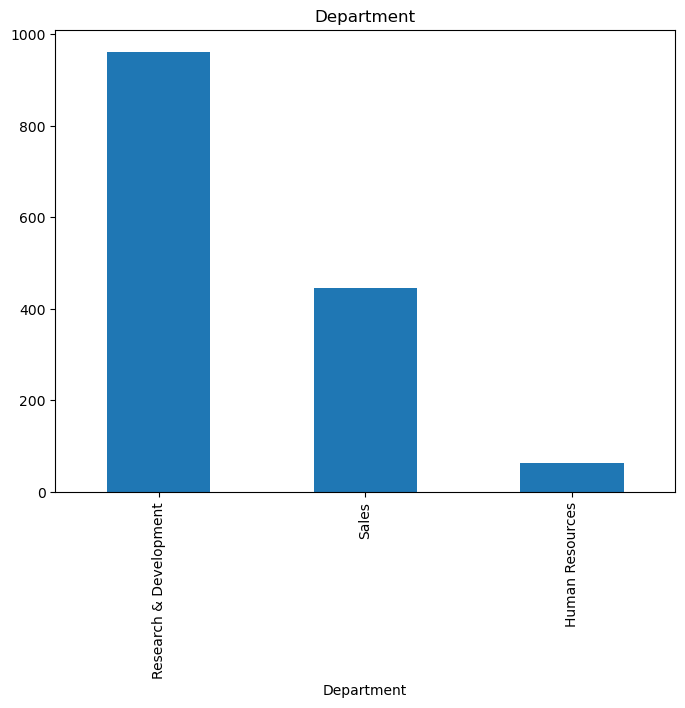

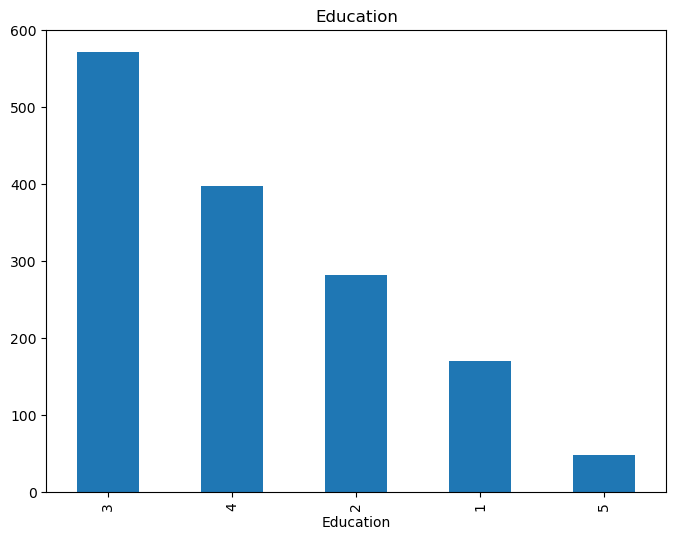

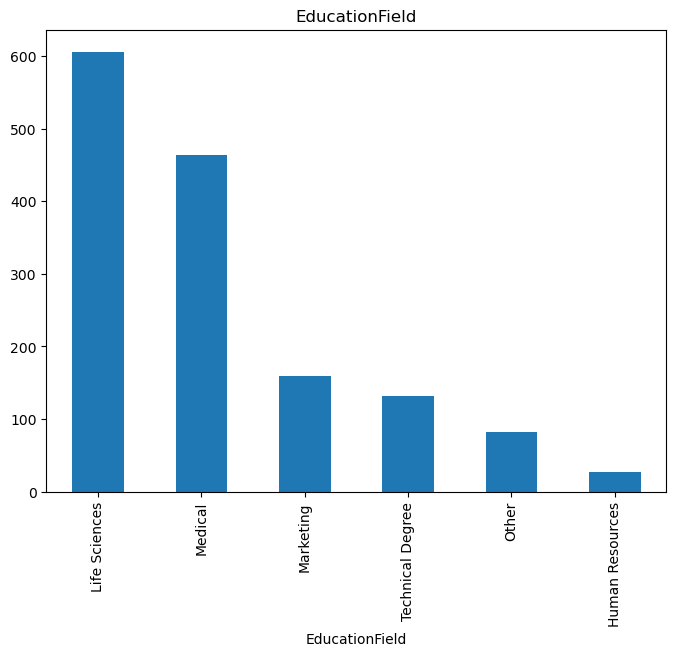

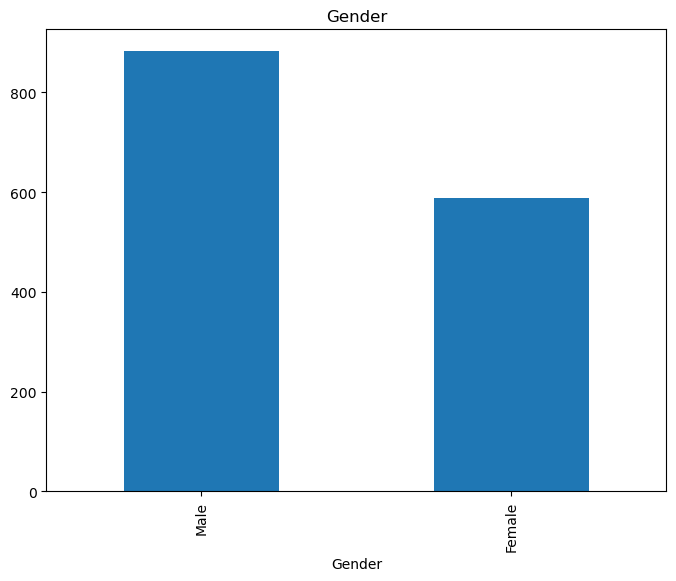

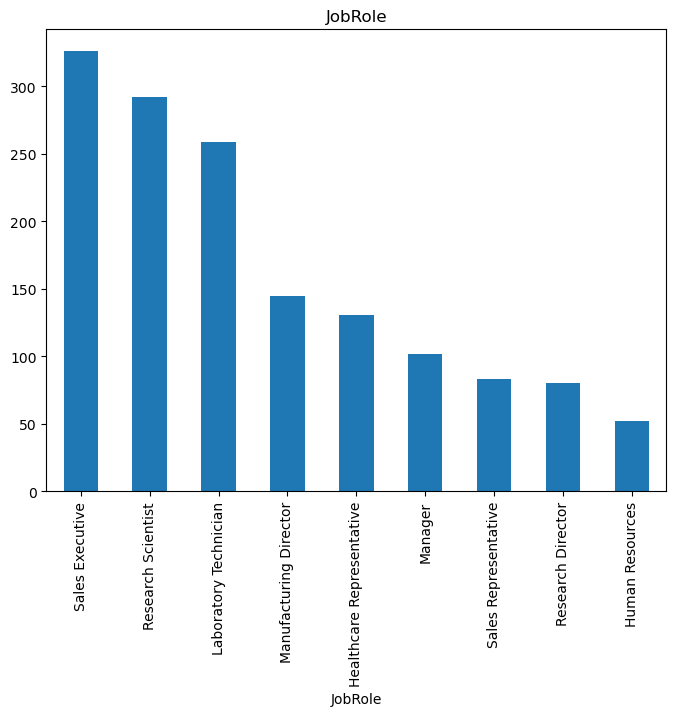

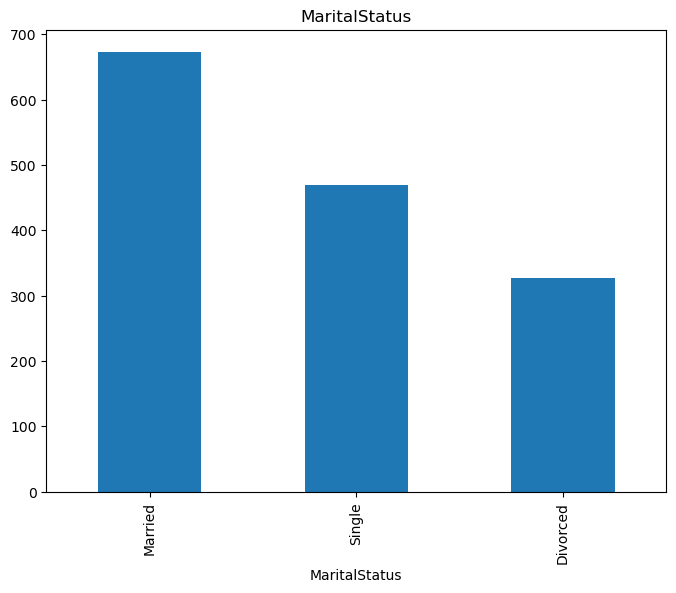

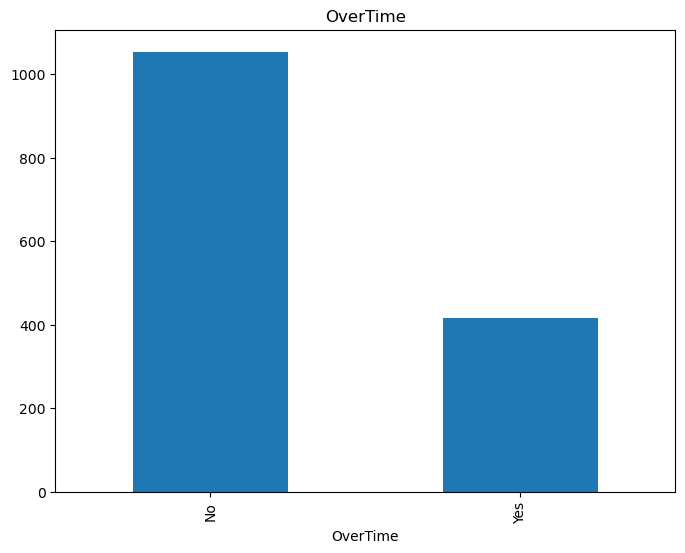

In [18]:
categorical_variables = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Value counts
#for var in categorical_variables:
   # print(df[var].value_counts())

# Bar plots
for var in categorical_variables:
    df[var].value_counts().plot(kind='bar', figsize=(8, 6), title=var)
    plt.show()

### Multi Variate Analysis

### Correlation Matrix

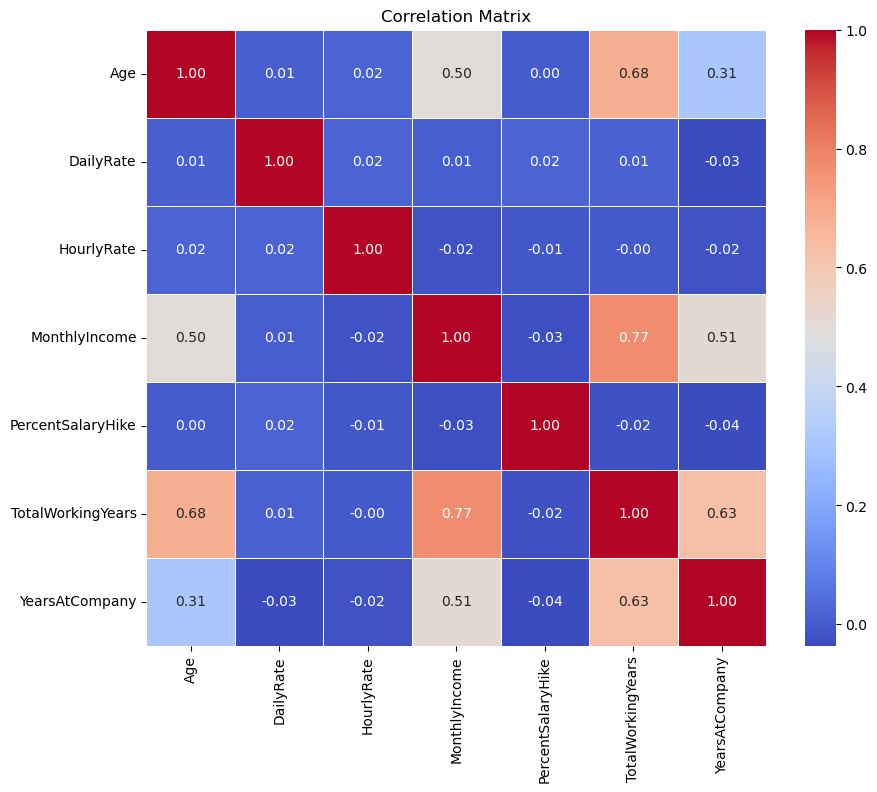

In [19]:
numeric_variables = ['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany']

# Correlation matrix
correlation_matrix = df[numeric_variables].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Pair Plot

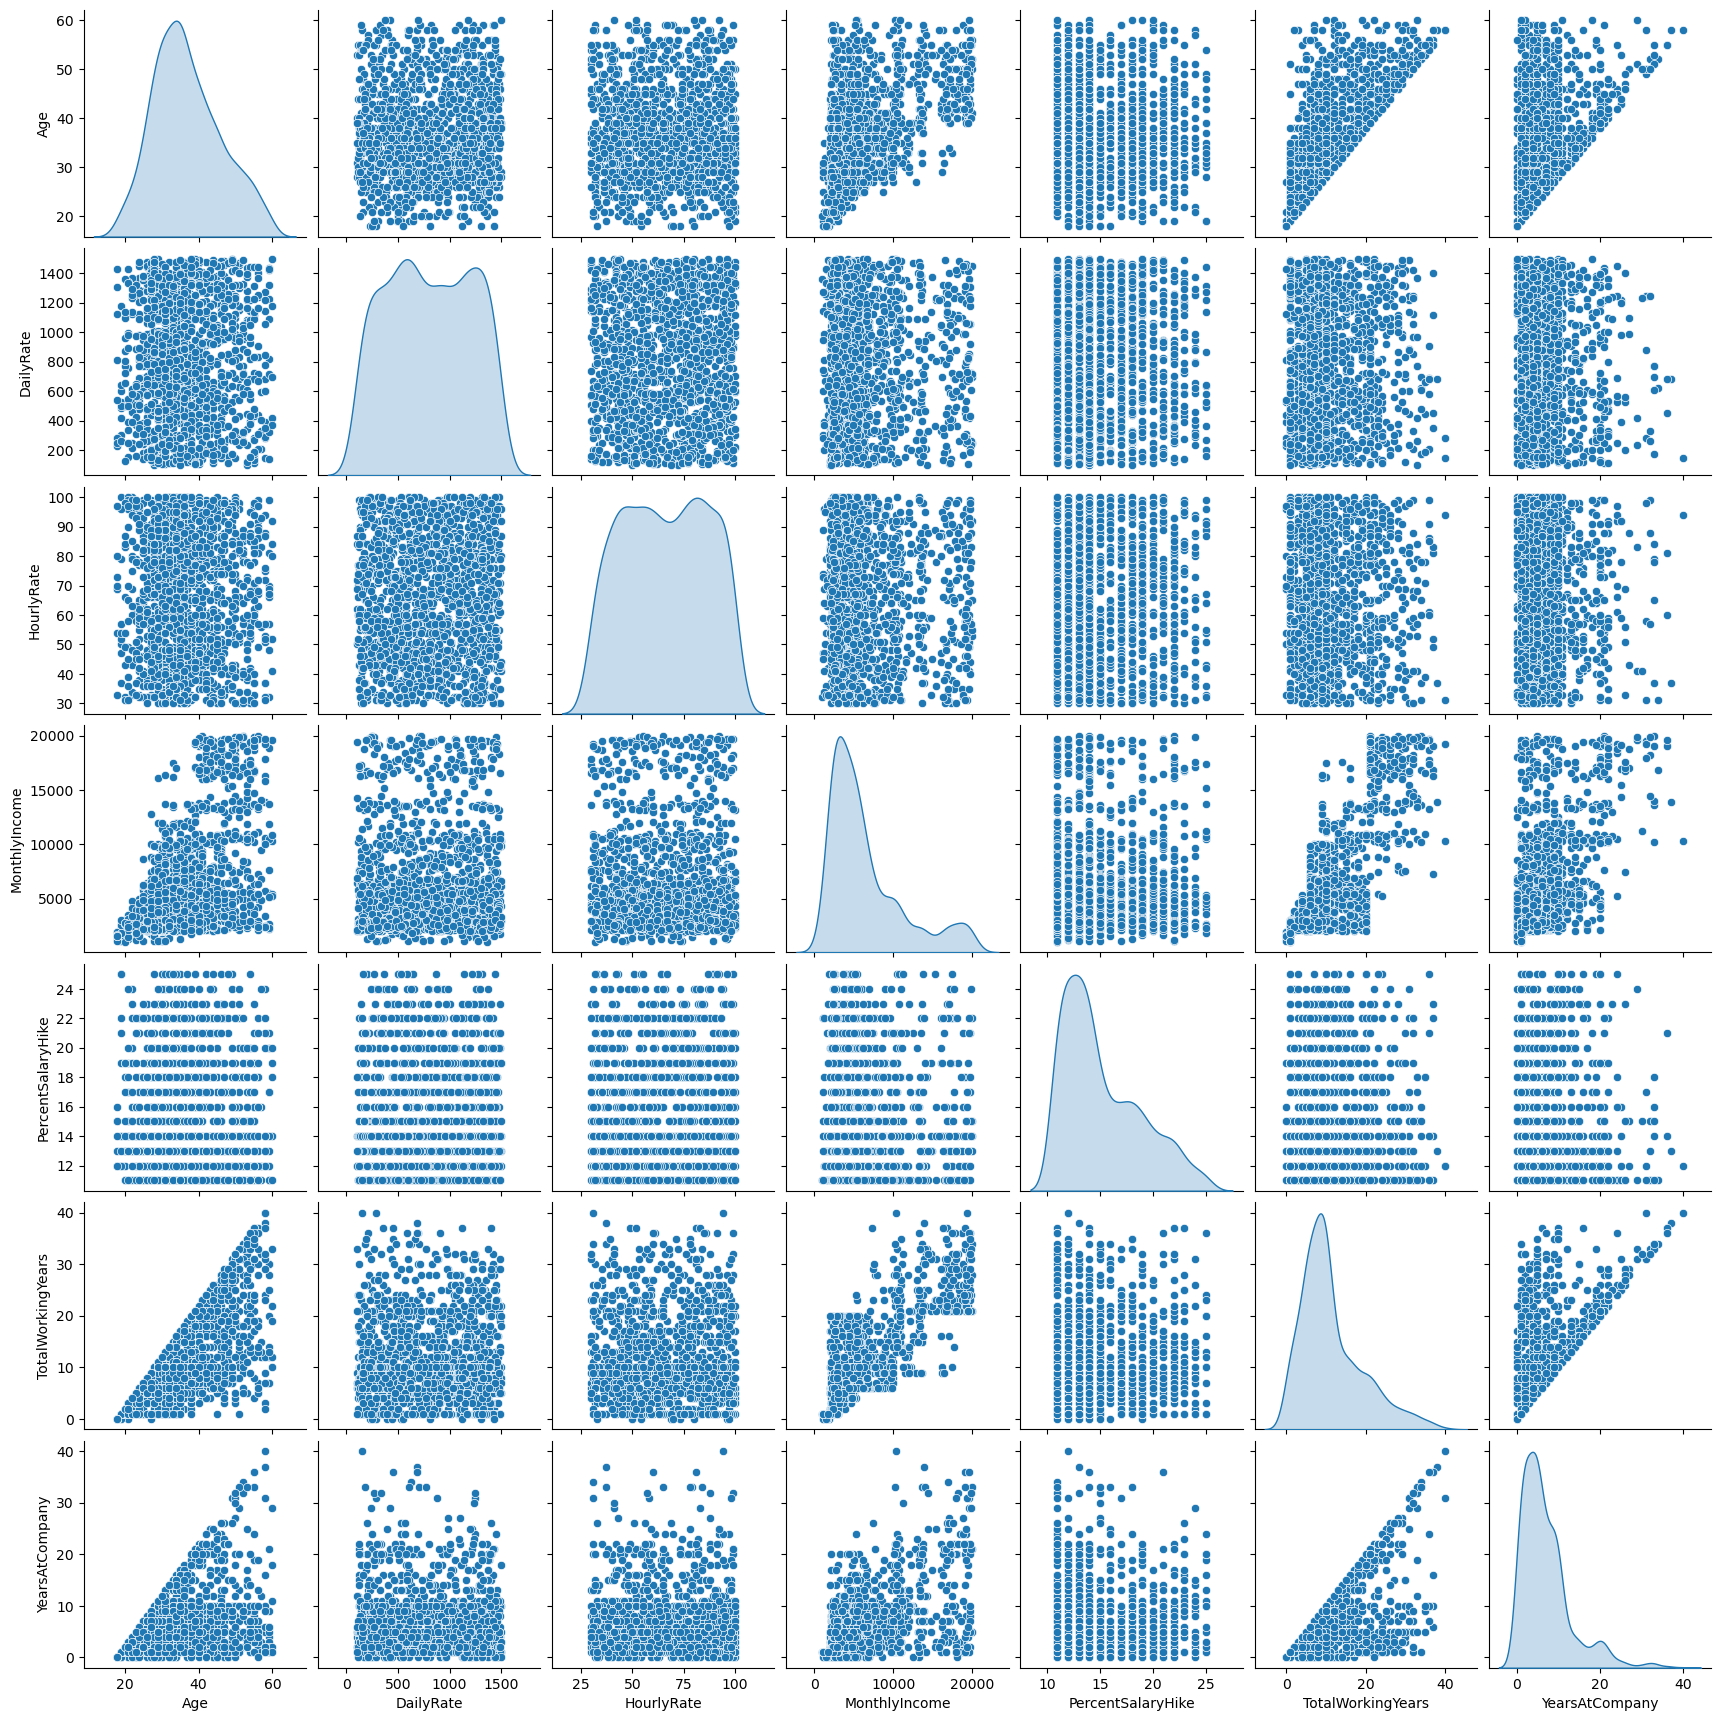

In [20]:
sns.pairplot(df[numeric_variables], diag_kind='kde')
plt.show()

### Stacked Bar Plot

Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156


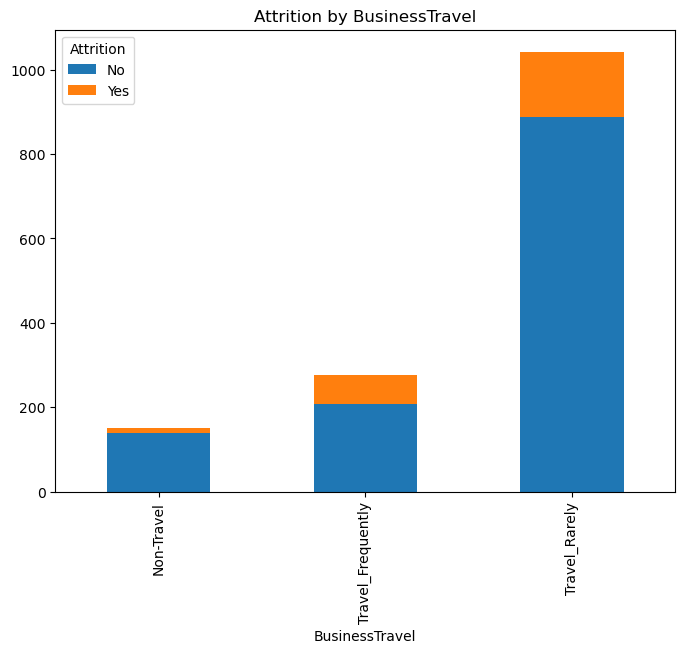

In [21]:
# Cross-tabulation
cross_tab = pd.crosstab(df['BusinessTravel'], df['Attrition'])
print(cross_tab)

# Stacked bar plot
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6), title='Attrition by BusinessTravel')
plt.show()

### Viloin Plot

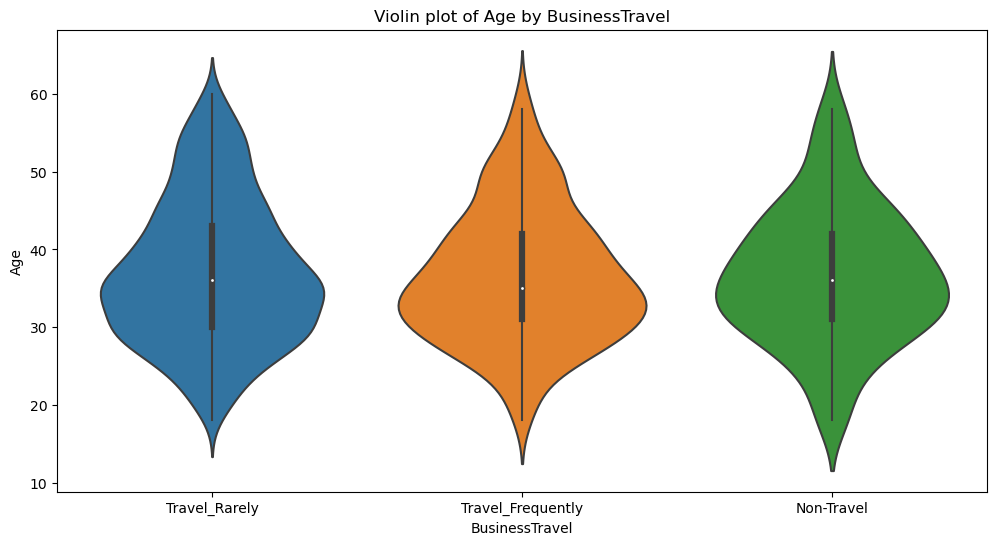

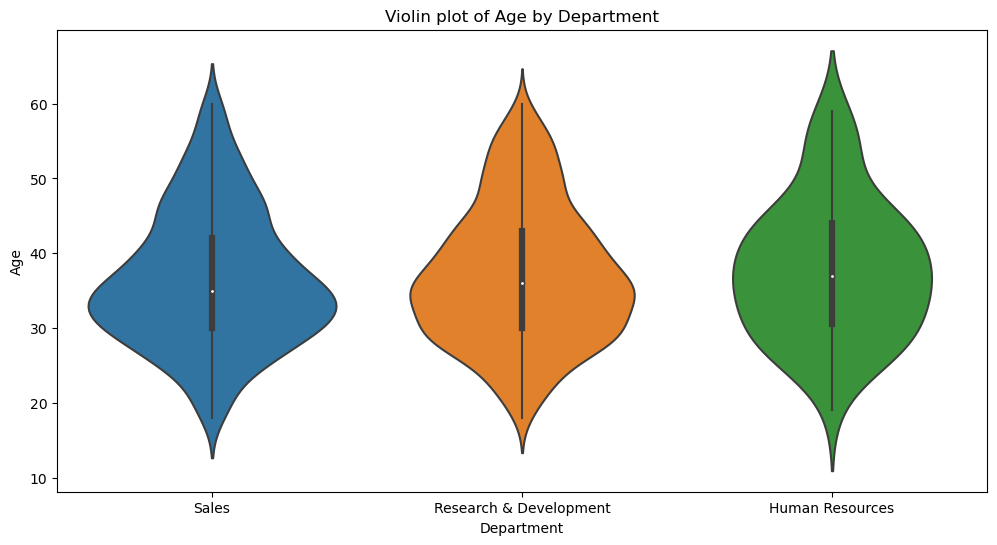

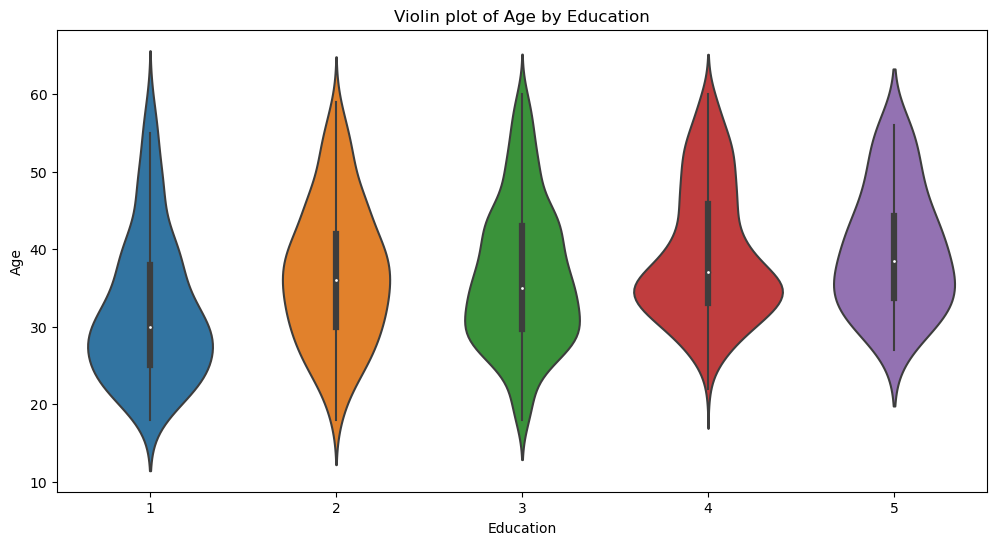

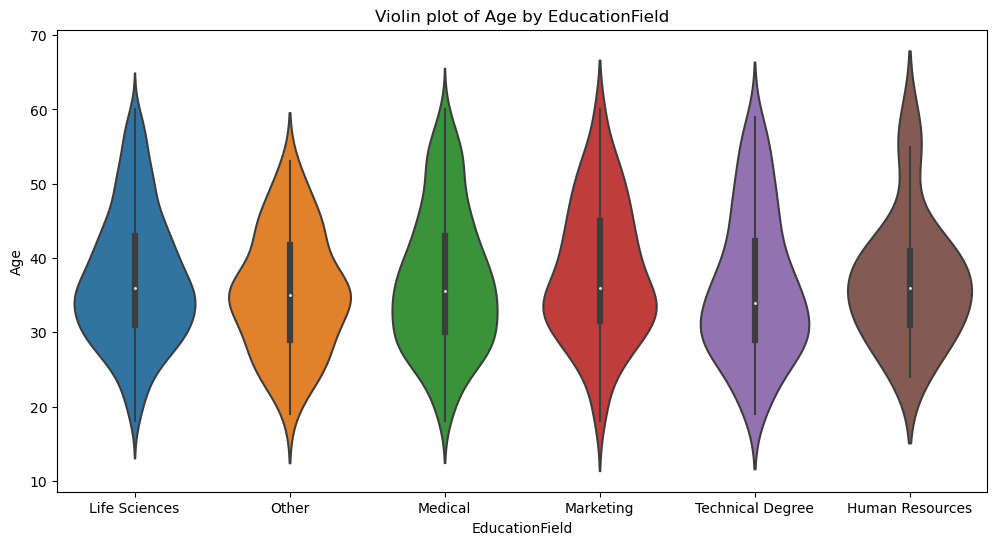

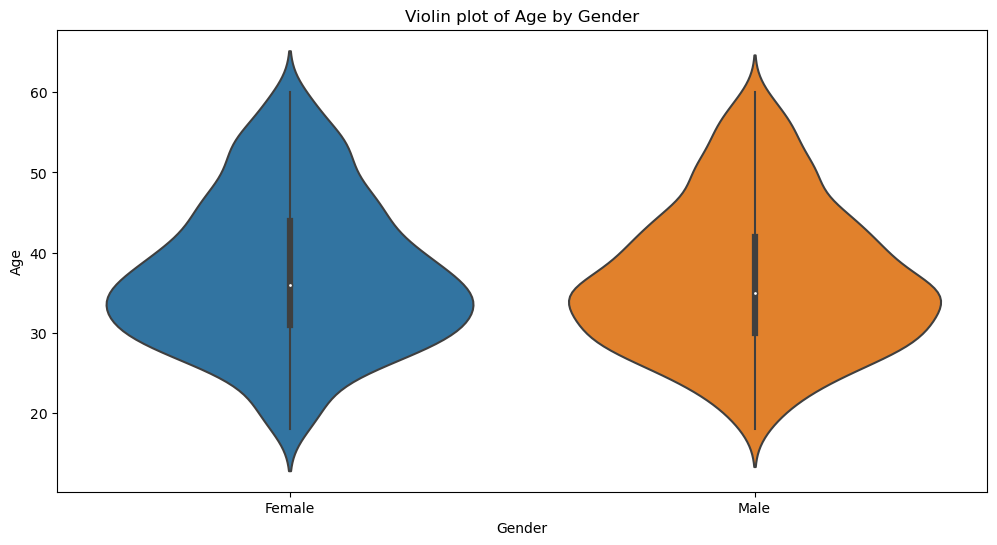

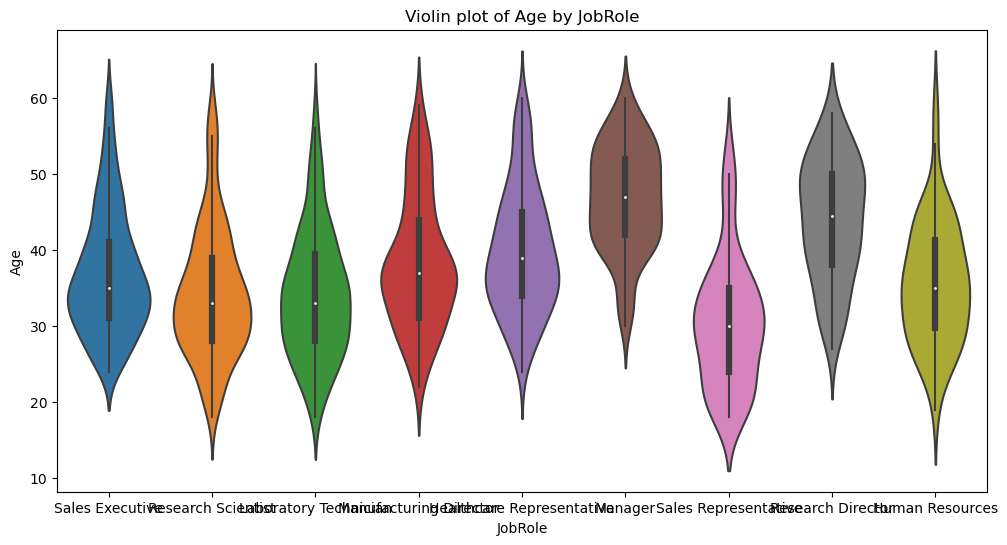

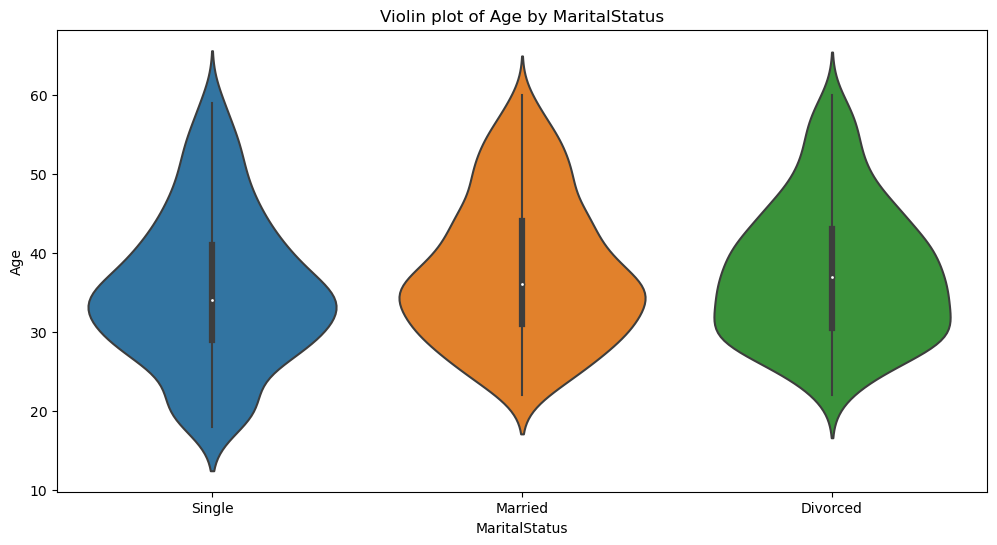

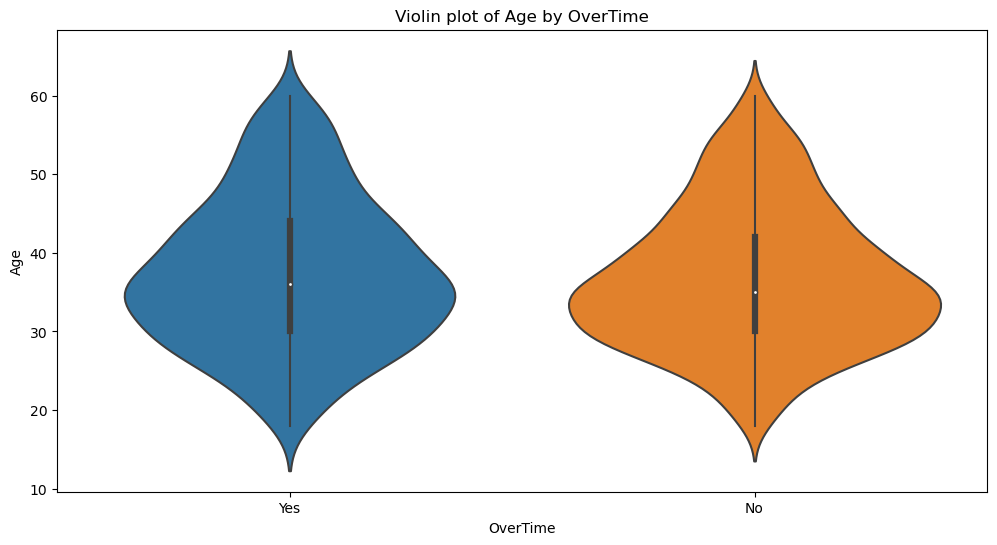

In [22]:
# Violin plots
for cat_var in categorical_variables:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=cat_var, y='Age', data=df)
    plt.title(f'Violin plot of Age by {cat_var}')
    plt.show()


## Data Preproccesing

### Label Encoding The Categorical Values

In [23]:
le = LabelEncoder()

In [24]:
for i in df.columns:
    if df[i].dtype == "object" or 'category':
        df[i]=le.fit_transform(df[i])

In [25]:
df.duplicated().sum()

0

In [26]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      23          1               2        624           2                 0   
1      31          0               1        113           1                 7   
2      19          1               2        805           1                 1   
3      15          0               1        820           1                 2   
4       9          0               2        312           1                 1   
...   ...        ...             ...        ...         ...               ...   
1465   18          0               1        494           1                22   
1466   21          0               2        327           1                 5   
1467    9          0               2         39           1                 3   
1468   31          0               1        579           2                 1   
1469   16          0               2        336           1                 7   

      Education  EducationField  EmployeeCount  EnvironmentSatisfaction  \
0             1               1              0                        1   
1             0               1              0                        2   
2             1               4              0                        3   
3             3               1              0                        3   
4             0               3              0                        0   
...         ...             ...            ...                      ...   
1465          1               3              0                        2   
1466          0               3              0                        3   
1467          2               1              0                        1   
1468          2               3              0                        3   
1469          2               3              0                        1   

      Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  \
0          0          64               2         1        7                3   
1          1          31               1         1        6                1   
2          1          62               1         0        2                2   
3          0          26               2         0        6                2   
4          1          10               2         0        2                1   
...      ...         ...             ...       ...      ...              ...   
1465       1          11               3         1        2                3   
1466       1          12               1         2        0                0   
1467       1          57               3         1        4                1   
1468       1          33               1         1        7                1   
1469       1          52               3         1        2                2   

      MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  \
0                 2            809          999                   8       0   
1                 1            682         1328                   1       0   
2                 2             62           18                   6       0   
3                 1            313         1228                   1       0   
4                 1            399          846                   9       0   
...             ...            ...          ...                 ...     ...   
1465              1            210          599                   4       0   
1466              1           1070         1123                   4       0   
1467              1            821          175                   1       0   
1468              1            730          641                   2       0   
1469              1            554          483                   2       0   

      OverTime  PercentSalaryHike  PerformanceRating  \
0            1                  0                  0   
1            0                 12                  1   
2            1                  4                  0  

## Feature Selection

### Feature Engineering

In [27]:
x = df.drop('Attrition', axis=1)  # Features
y = df['Attrition']  # Target variable

### Checking Data Balanced Or Not

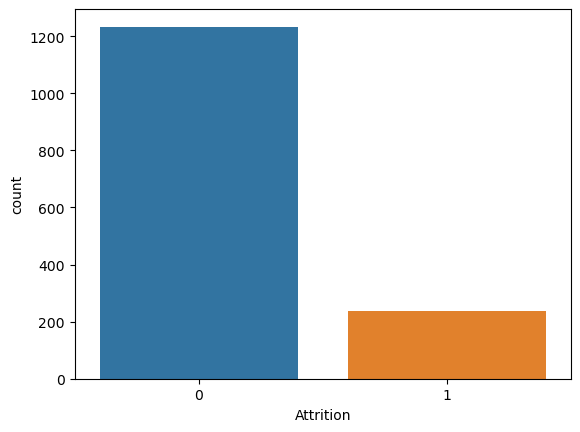

In [28]:
sns.countplot(x=y);

In [29]:
df.Attrition.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

##### We can see data is not balanced

### Balancing The Data Using Smote

In [30]:
smote = SMOTE()

In [31]:
x_smote , y_smote = smote.fit_resample(x,y)

In [32]:
y_smote

0       1
1       0
2       1
3       0
4       0
       ..
2461    1
2462    1
2463    1
2464    1
2465    1
Name: Attrition, Length: 2466, dtype: int32

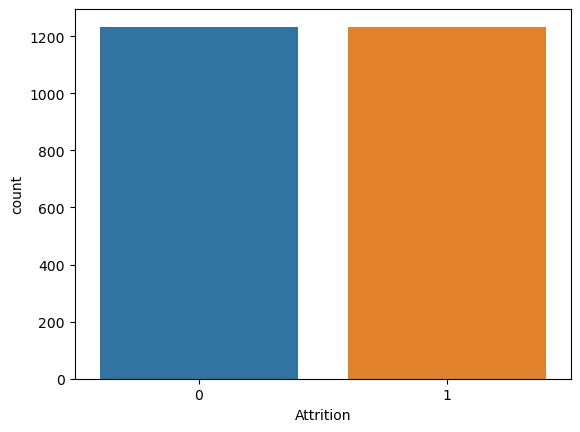

In [33]:
sns.countplot(x = y_smote);

## Scaling The Data

In [34]:
sc = StandardScaler()

In [35]:
x = sc.fit_transform(x_smote)

## Splitting The Data

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y_smote,test_size=0.2,random_state=42,shuffle=True)

In [37]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier"   : KNeighborsClassifier(),
    "SVC" : SVC(probability=True)
}

## Model Selection

In [38]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    score_train =accuracy_score (y_train, model.predict(x_train))
    score_tst = accuracy_score(y_test, model.predict(x_test))
    con_train = confusion_matrix(y_train, model.predict(x_train))
    con_test = confusion_matrix(y_test, model.predict(x_test))
    print("Model accuracy on train is:: ",score_train)
    print("Model accuracy on test is:: ", score_tst)
    print("confusion_matrix train is:: ", con_train)
    print("confusion_matrix test is:: ", con_test)
    print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
    print("*"*60)

model trained with LogisticRegression
Model accuracy on train is::  0.8438133874239351
Model accuracy on test is::  0.8259109311740891
confusion_matrix train is::  [[829 154]
 [154 835]]
confusion_matrix test is::  [[204  46]
 [ 40 204]]
Wrong Predictions made: 86 / 494
************************************************************
model trained with DecisionTreeClassifier
Model accuracy on train is::  1.0
Model accuracy on test is::  0.8178137651821862
confusion_matrix train is::  [[983   0]
 [  0 989]]
confusion_matrix test is::  [[196  54]
 [ 36 208]]
Wrong Predictions made: 90 / 494
************************************************************
model trained with RandomForestClassifier
Model accuracy on train is::  1.0
Model accuracy on test is::  0.902834008097166
confusion_matrix train is::  [[983   0]
 [  0 989]]
confusion_matrix test is::  [[231  19]
 [ 29 215]]
Wrong Predictions made: 48 / 494
************************************************************
model trained with KNeighbo

Model used is::  LogisticRegression()


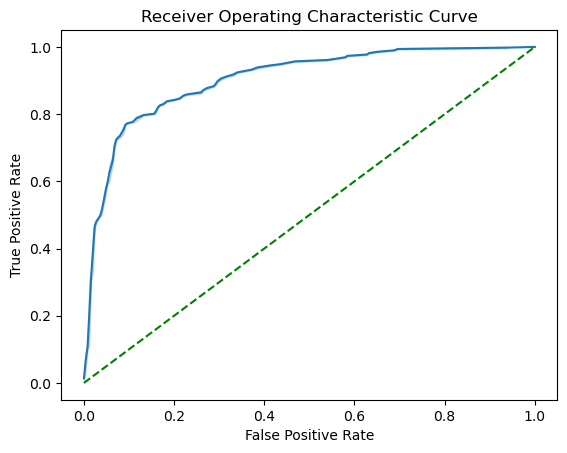

Model used is::  DecisionTreeClassifier()


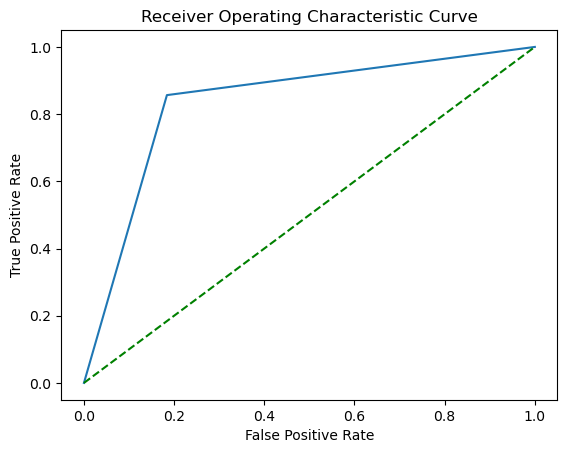

Model used is::  RandomForestClassifier()


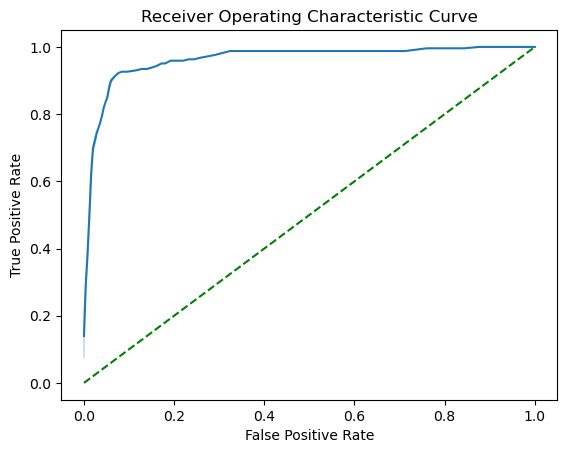

Model used is::  KNeighborsClassifier()


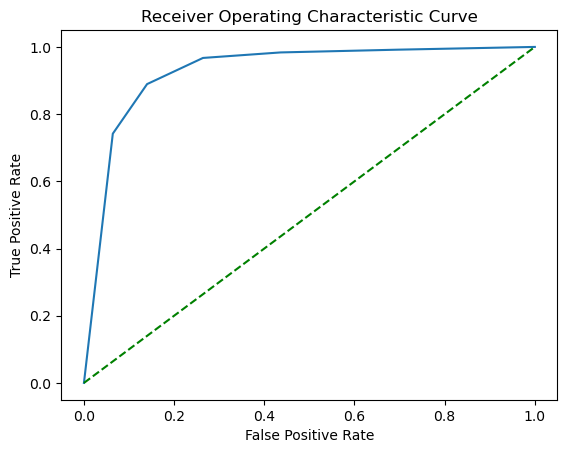

Model used is::  SVC(probability=True)


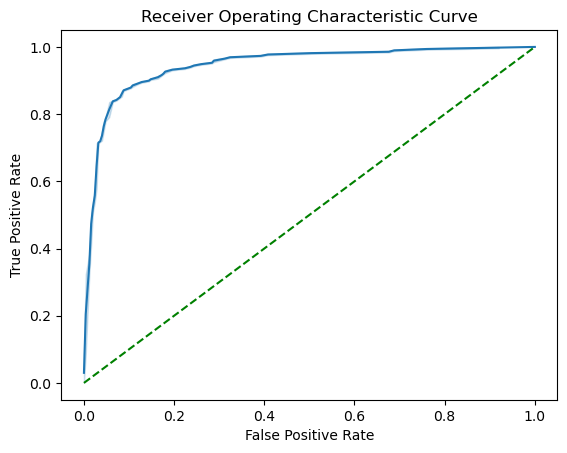

In [39]:
for name, model in models.items():
    model.fit(x_train, y_train)
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("Model used is:: ",model)
    sns.lineplot(x= fpr, y=tpr)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.show()

## Fitting Data To The  Best Model

In [40]:
model=RandomForestClassifier()

In [41]:
model.fit(x_train , y_train)

RandomForestClassifier()

## Creating Dataframe Of Actual And Predicted Value

In [42]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"))


In [43]:
OUTPUT["ACTUAL"] = OUTPUT["ACTUAL"].astype("int")
OUTPUT["PREDICTION"] = OUTPUT["PREDICTION"].astype("int")

In [44]:
OUTPUT

ACTUAL  PREDICTION
0          1           1
1          0           0
2          1           1
3          0           0
4          0           0
...      ...         ...
1465       0           0
1466       0           0
1467       0           0
1468       0           0
1469       0           0

[1470 rows x 2 columns]

In [45]:
OUTPUT.sample(20)

ACTUAL  PREDICTION
1245       0           0
971        0           0
487        0           0
302        0           0
432        0           0
31         0           0
1180       0           0
366        1           1
353        0           0
1330       0           0
256        0           0
1108       0           0
1263       0           0
447        0           0
522        0           0
40         0           0
891        0           0
442        0           0
905        0           0
375        0           0

## Confusion Matrix

In [46]:
y_pred=model.predict(x_test)

In [47]:
con_test =confusion_matrix(y_test,y_pred)

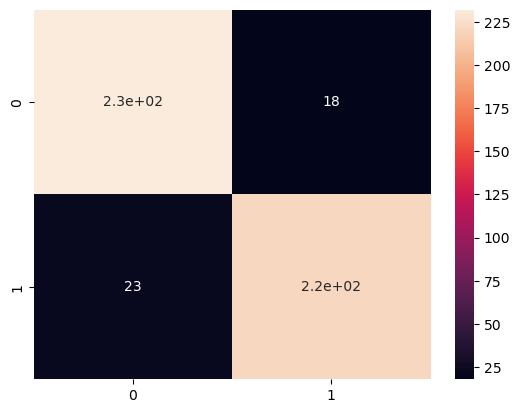

In [48]:
sns.heatmap(con_test,annot=True);

## Roc Curve

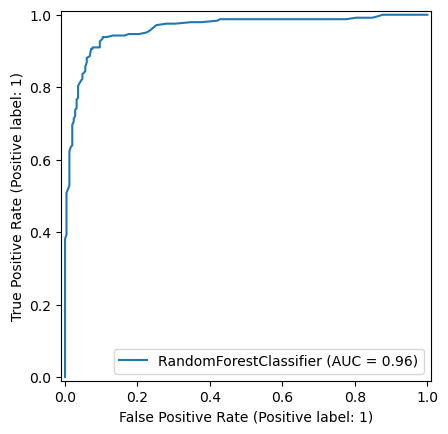

In [49]:
Roc_Display = RocCurveDisplay.from_estimator(model,x_test,y_test)